<a href="https://colab.research.google.com/github/zhulkhoirrifat/nuka-pos/blob/main/seeding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library & Setup

In [1]:
!pip install faker bcrypt

In [2]:
from faker import Faker
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import os
import json
import bcrypt

In [3]:
fake = Faker('id_ID')

## Generate Function

### Users

In [4]:
role_distribution = {
    "Owner": 10,
    "Admin Toko": 50,
    "Kasir": 100,
    "Superadmin": 10
}

role_id_mapping = {
    "Owner": 2,
    "Admin Toko": 3,
    "Kasir": 4,
    "Superadmin": 1
}

In [5]:
def fake_phone_number(fake: Faker) -> str:
    provider_prefixes = {
        'Telkomsel': ['0811', '0812', '0813', '0821', '0822', '0823', '0852', '0853', '0851'],
        'XL': ['0817', '0818', '0819', '0859', '0877', '0878'],
        'Indosat': ['0814', '0815', '0816', '0855', '0856', '0857', '0858'],
        'Tri': ['0895', '0896', '0897', '0898', '0899'],
        'Smartfren': ['0881', '0882', '0883', '0884', '0885', '0886', '0887', '0888', '0889']
    }

    provider = random.choice(list(provider_prefixes.keys()))
    prefix = random.choice(provider_prefixes[provider])

    random_digits = fake.numerify(text='#######')

    return f'62{prefix[1:]}{random_digits}'

In [6]:
def generate_users(role_distribution, role_id_mapping):
    """ Membuat data dummy users
    Args:
        role_distribuiton(dict): Jumlah distribusi role pada user.
        role_id_mapping(dict): Id role pada tabel roles
    Return:
        users_data(list): Hasil generate data dummy users

    """
    users_data = []
    user_id = 1

    for role, jumlah in role_distribution.items():
        for _ in range(jumlah):

            name_male = fake.first_name_male() + " " + fake.last_name_male()
            name_female = fake.first_name_female() + " " + fake.last_name_female()

            email = fake.email()
            phone_number = fake_phone_number(fake)
            plain_password = fake.password()
            password = bcrypt.hashpw(plain_password.encode('utf-8'), bcrypt.gensalt(10)).decode('utf-8')
            gender = random.choice(['MALE', 'FEMALE'])
            name = name_male if gender == 'MALE' else name_female
            image_url = fake.image_url()
            id_card = fake.image_url()
            npwp = fake.image_url()
            role_id = role_id_mapping[role]

            users_data.append({
                'userId': user_id,
                'name': name,
                'email': email,
                'password': password,
                'imageUrl': image_url,
                'phoneNumber': phone_number,
                'isEmailVerified': 1,
                'roleId': role_id
            })
            user_id += 1
    return users_data

In [7]:
users_data = generate_users(role_distribution, role_id_mapping)
users_df = pd.DataFrame(users_data)
users_df.to_csv('users.csv', index=False)

In [8]:
users_df

,userId,name,email,password,imageUrl,phoneNumber,isEmailVerified,roleId
0,1,Ade Nugroho,candrakanta87@example.org,$2b$10$Iia73suyT4RalF5Li3NYXenPdtogWb4h0k104rZ...,https://dummyimage.com/623x454,628830166957,1,2
1,2,Sakura Yulianti,cakrawala68@example.com,$2b$10$R23InYxVfquebkcPjZbMjejAPep.BHWiZLExhuk...,https://placekitten.com/608/928,628173192619,1,2
2,3,Bajragin Dabukke,prabowohamzah@example.net,$2b$10$G4zNJo.UxUb7bxxyFbSQhOFKKWg/GuipLH0lf//...,https://placekitten.com/908/221,628561399779,1,2
3,4,Gamanto Wibisono,sinagakarja@example.org,$2b$10$aiTX0GUqH3WsXW0pyuOh/eUapjdRl6.eRdYpJHZ...,https://dummyimage.com/686x429,628150478773,1,2
4,5,Bambang Wijaya,mamanpadmasari@example.com,$2b$10$o0uJq7Ri.W.sfz1jPim.t.a.Kj7y55b8mNkEFdB...,https://dummyimage.com/428x1015,628533652411,1,2
...,...,...,...,...,...,...,...,...
165,166,Puspa Purwanti,aryaninugraha@example.org,$2b$10$b8P1IvBfDiRMy2yF.aJuFeFjZLONEaqSsQFALko...,https://dummyimage.com/259x773,628840790816,1,1
166,167,Usyi Puspasari,vsafitri@example.com,$2b$10$fYVchASzDGOuclOFyvz5dOG9KpT2fIF09YQubvt...,https://dummyimage.com/291x871,628157009865,1,1
167,168,Waluyo Sihotang,kenari01@example.net,$2b$10$QrMhJWRvamIbZ1dREF934e4nOQUSQaszoW6bpe6...,https://dummyimage.com/512x47,628825170081,1,1
168,169,Tami Melani,kurniawanjatmiko@example.net,$2b$10$86C9gaoVnPYxcn2.37xmQOv.pyVYHkVXpxeIpcj...,https://dummyimage.com/353x762,628225692876,1,1


### Tenants

In [9]:
province_id = 32
city_id = 71

districts = {
    "5579": "BALIKPAPAN SELATAN",
    "5753": "BALIKPAPAN KOTA",
    "5783": "BALIKPAPAN TIMUR",
    "5693": "BALIKPAPAN UTARA",
    "5507": "BALIKPAPAN TENGAH",
    "5689": "BALIKPAPAN BARAT"
}

villages = {
    "5579": [
        {"id": "60411", "name": "GUNUNG BAHAGIA"},
        {"id": "62966", "name": "SEPINGGAN"},
        {"id": "60197", "name": "DAMAI BARU"},
        {"id": "60196", "name": "DAMAI BAHAGIA"},
        {"id": "59139", "name": "SUNGAI NANGKA"},
        {"id": "62968", "name": "SEPINGGAN RAYA"},
        {"id": "62967", "name": "SEPINGGAN BARU"}
    ],
    "5753": [
        {"id": "62384", "name": "PRAPATAN"},
        {"id": "63153", "name": "TELAGA SARI"},
        {"id": "60900", "name": "KLANDASAN ULU"},
        {"id": "60899", "name": "KLANDASAN ILIR"},
        {"id": "60195", "name": "DAMAI"}
    ],
    "5783": [
        {"id": "61365", "name": "MANGGAR"},
        {"id": "61366", "name": "MANGGAR BARU"},
        {"id": "61019", "name": "LEMARU"},
        {"id": "63284", "name": "TERITIP"}
    ],
    "5693": [
        {"id": "61718", "name": "MUARA RAPAK"},
        {"id": "60412", "name": "GUNUNG SAMARINDA"},
        {"id": "59798", "name": "BATU AMPAR"},
        {"id": "60710", "name": "KARANG JOANG"},
        {"id": "60413", "name": "GUNUNG SAMARINDA BARU"},
        {"id": "60379", "name": "GRAHA INDAH"}
    ],
    "5507": [
        {"id": "60414", "name": "GUNUNG SARI ILIR"},
        {"id": "60415", "name": "GUNUNG SARI ULU"},
        {"id": "61482", "name": "MEKAR SARI"},
        {"id": "60714", "name": "KARANG REJO"},
        {"id": "58912", "name": "SUMBER REJO"},
        {"id": "60708", "name": "KARANG JATI"}
    ],
    "5689": [
        {"id": "59771", "name": "BARU TENGAH"},
        {"id": "61407", "name": "MARGA SARI"},
        {"id": "59769", "name": "BARU ILIR"},
        {"id": "61411", "name": "MARGO MULYO"},
        {"id": "59772", "name": "BARU ULU"},
        {"id": "60731", "name": "KARIANGAU"}
    ]
}

In [10]:
def generate_tenants(users_data):
    """ Membuat data dummy tenants.
    Args:
        users_data(list): Data users yang telah digenerate.

    Return:
        tenants_data(list): Hasil generate data dummy tenants.
    """
    tenants_data = []
    tenant_id = 1
    global province_id, city_id

    for i, user in enumerate(users_data):
        if user['roleId'] == 2:
            user_id = user['userId']
            name = fake.company()
            npwp_company_number = random.randint(100000000000000, 999999999999999)
            npwp_company_image= fake.image_url()
            province_id = province_id
            city_id = city_id
            district_id = random.choice(list(districts.keys()))
            village = random.choice(villages[district_id])
            village_id = village['id']

            tenants_data.append({
                'tenantId': tenant_id,
                'userId': user_id,
                'name': name,
                'npwpCompanyNumber': npwp_company_number,
                'npwpCompanyImage': npwp_company_image,
                'provinceId': province_id,
                'cityId': city_id,
                'districtId': district_id,
                'villageId': village_id,
            })
            tenant_id += 1

    return tenants_data

In [11]:
tenants_data = generate_tenants(users_data)
tenants_df = pd.DataFrame(tenants_data)
tenants_df.to_csv('tenants.csv', index=False)

In [12]:
tenants_df

,tenantId,userId,name,npwpCompanyNumber,npwpCompanyImage,provinceId,cityId,districtId,villageId
0,1,1,CV Hassanah Salahudin,268610250765184,https://placekitten.com/147/272,32,71,5783,61365
1,2,2,PD Prasetyo,938251247799478,https://picsum.photos/616/518,32,71,5693,60413
2,3,3,CV Wasita,616885079819916,https://picsum.photos/335/479,32,71,5579,62968
3,4,4,PT Mandala,883500541001470,https://picsum.photos/1001/118,32,71,5507,61482
4,5,5,CV Siregar (Persero) Tbk,358063484799136,https://dummyimage.com/651x824,32,71,5783,61366
5,6,6,PD Usada (Persero) Tbk,760324057045027,https://picsum.photos/823/201,32,71,5783,61365
6,7,7,CV Hassanah,101793439784464,https://placekitten.com/682/865,32,71,5753,62384
7,8,8,PD Budiman Mardhiyah,282912284710996,https://placekitten.com/371/97,32,71,5693,60710
8,9,9,Perum Lailasari Rajasa,185206005134350,https://dummyimage.com/539x39,32,71,5753,60900
9,10,10,PT Waluyo Wibowo,660377656712185,https://placekitten.com/693/150,32,71,5579,60196


### Stores

In [13]:
store_types_dict = {
    1: 'Makanan & Minuman',
    2: 'Fashion & Aksesoris',
    3: 'Perawatan Diri & Kecantikan',
    4: 'Elektronik, Gadget & Alat Musik',
    5: 'Perlengkapan Rumah Tangga & Dekorasi',
    6: 'Otomotif & Suku Cadang',
    7: 'Pertanian, Peternakan & Toko Hewan',
    8: 'Mainan, Hobi & Peralatan Outdoor',
    9: 'Peralatan Bayi & Anak',
    10: 'Minimarket & Kelontong',
    11: 'Produk Kesehatan',
    12: 'Pulsa & Layanan'
}

store_types_list = [{'storeTypeId': k, 'name': v} for k, v in store_types_dict.items()]

In [14]:
def generate_stores(tenants_data, store_types_dict, total_stores=30):
    """ Membuat data dummy stores dengan distribusi acak.
    Args:
        tenants_data (list): Data tenant yang telah digenerate.
        store_types_dict (dict): Dictionary tipe dari toko yang akan di-generate.
        total_stores (int): Total toko yang akan digenerate.

    Return:
        stores_data (list): Hasil generate data dummy stores.
    """
    stores_data = []
    store_id = 1
    store_names = {}
    owner_ids = [tenant["userId"] for tenant in tenants_data]

    def generate_unique_store_name(base_name):
        if base_name not in store_names:
            store_names[base_name] = 1
            return base_name
        else:
            store_names[base_name] += 1
            return f'{base_name} Cabang {store_names[base_name]}'

    # Tentukan jumlah toko yang dimiliki setiap tenant secara acak
    store_distribution = {owner_id: random.randint(1, 5) for owner_id in owner_ids}  # Bisa memiliki 1 hingga 5 toko

    for owner_id, num_stores in store_distribution.items():
        for _ in range(num_stores):
            if len(stores_data) >= total_stores:
                break  # Berhenti jika jumlah toko sudah cukup

            store_type_id, store_type_name = random.choice(list(store_types_dict.items()))
            district_id = random.choice(list(districts.keys()))
            village = random.choice(villages[district_id])
            village_id = village['id']
            owner_name = next(user['name'] for user in users_data if user['userId'] == owner_id)
            base_name = f"{store_type_name} {owner_name.split()[1]}"
            name = generate_unique_store_name(base_name)

            stores_data.append({
                "storeId": store_id,
                "StoreCode": f'STR-{random.randint(100000000000,999999999999)}',
                "tenantId": owner_id,
                "name": name,
                "image": fake.image_url(),
                "address": fake.address(),
                "provinceId": province_id,
                "cityId": city_id,
                "districtId": district_id,
                "villageId": village_id,
                "storeTypeId": store_type_id,
                "postalCode": fake.postcode(),
                "description": fake.text(),
                "phoneNumber": fake.phone_number(),
                "logo": fake.image_url(),
                "npwpCompany": fake.image_url(),
                "permitCertificate": fake.image_url(),
                "status": 'ACTIVE'
            })
            store_id += 1

    return stores_data

In [15]:
stores_data = generate_stores(tenants_data, store_types_dict)
stores_df = pd.DataFrame(stores_data)
stores_df.to_csv('stores.csv', index=False)

In [16]:
stores_df

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
0,1,STR-370018646069,1,Perawatan Diri & Kecantikan Nugroho,https://dummyimage.com/671x280,"Gg. Abdul Muis No. 6\nBalikpapan, Gorontalo 47430",32,71,5753,60900,3,71436,Deleniti eius voluptates est numquam at nemo.\...,+62 (064) 092 4497,https://dummyimage.com/382x605,https://dummyimage.com/457x773,https://placekitten.com/863/172,ACTIVE
1,2,STR-494757352083,1,"Mainan, Hobi & Peralatan Outdoor Nugroho",https://dummyimage.com/408x349,"Jalan Bangka Raya No. 77\nLubuklinggau, KS 94284",32,71,5689,61411,8,91609,Quos dolores deleniti quaerat enim. Occaecati ...,+62 (85) 095 0963,https://dummyimage.com/693x16,https://picsum.photos/38/645,https://placekitten.com/276/735,ACTIVE
2,3,STR-170760982963,1,Otomotif & Suku Cadang Nugroho,https://dummyimage.com/440x174,"Gang Pasir Koja No. 031\nPariaman, Jambi 29739",32,71,5579,62968,6,02599,Quibusdam tempora veritatis doloremque modi co...,+62 (311) 696-2786,https://placekitten.com/638/398,https://picsum.photos/734/274,https://placekitten.com/54/691,ACTIVE
3,4,STR-218927230148,1,"Pertanian, Peternakan & Toko Hewan Nugroho",https://placekitten.com/361/261,"Jalan Indragiri No. 3\nTanjungbalai, SR 59049",32,71,5507,58912,7,99154,Sed quis nulla officia minima earum voluptas. ...,+62 (019) 947 4620,https://placekitten.com/513/914,https://picsum.photos/940/40,https://dummyimage.com/646x306,ACTIVE
4,5,STR-473142625750,2,"Pertanian, Peternakan & Toko Hewan Yulianti",https://placekitten.com/215/337,"Jalan Surapati No. 62\nPalu, Jawa Barat 73635",32,71,5507,60414,7,99464,Natus officiis saepe labore maxime inventore d...,+62 (74) 459-1433,https://picsum.photos/803/639,https://picsum.photos/540/934,https://dummyimage.com/1016x5,ACTIVE
5,6,STR-953268590432,2,Peralatan Bayi & Anak Yulianti,https://dummyimage.com/965x676,"Gg. PHH. Mustofa No. 163\nTangerang, SS 25137",32,71,5783,61366,9,49041,Rerum dolorem porro nobis distinctio. Perferen...,+62-0404-120-3327,https://dummyimage.com/71x670,https://placekitten.com/344/714,https://placekitten.com/310/108,ACTIVE
6,7,STR-281434353904,2,Fashion & Aksesoris Yulianti,https://dummyimage.com/252x928,"Jl. Otto Iskandardinata No. 5\nSurakarta, JA 1...",32,71,5783,61019,2,26899,Ad iusto possimus perspiciatis saepe. Et assum...,+62-46-731-7232,https://picsum.photos/28/542,https://placekitten.com/593/24,https://placekitten.com/706/675,ACTIVE
7,8,STR-996961591983,3,"Pertanian, Peternakan & Toko Hewan Dabukke",https://placekitten.com/342/30,"Gg. Stasiun Wonokromo No. 5\nBanda Aceh, Sulaw...",32,71,5783,63284,7,92419,Quas ipsam magnam eligendi voluptatum ratione ...,+62-557-706-0624,https://picsum.photos/734/623,https://picsum.photos/780/4,https://placekitten.com/184/567,ACTIVE
8,9,STR-516183955577,3,Perlengkapan Rumah Tangga & Dekorasi Dabukke,https://dummyimage.com/228x262,"Jalan Pasirkoja No. 70\nTernate, Banten 64109",32,71,5689,59771,5,24041,Voluptatibus soluta eveniet tempore veniam. Qu...,+62 (025) 324-6465,https://picsum.photos/84/233,https://picsum.photos/95/997,https://dummyimage.com/465x535,ACTIVE
9,10,STR-841029507217,4,Otomotif & Suku Cadang Wibisono,https://picsum.photos/551/486,"Jl. H.J Maemunah No. 513\nPekanbaru, NB 77354",32,71,5753,62384,6,03991,Mollitia eius quod repudiandae rem illo. Asper...,+62-25-040-4774,https://picsum.photos/995/650,https://dummyimage.com/65x270,https://picsum.photos/55/804,ACTIVE


In [17]:
check_pemilik = stores_df['tenantId'].value_counts()
print(check_pemilik)

tenantId
7    5
6    5
1    4
8    4
2    3
4    3
9    3
3    2
5    1
Name: count, dtype: int64


In [18]:
jumlah_toko = stores_df[stores_df['tenantId'] == 3]

jumlah_toko

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
7,8,STR-996961591983,3,"Pertanian, Peternakan & Toko Hewan Dabukke",https://placekitten.com/342/30,"Gg. Stasiun Wonokromo No. 5\nBanda Aceh, Sulaw...",32,71,5783,63284,7,92419,Quas ipsam magnam eligendi voluptatum ratione ...,+62-557-706-0624,https://picsum.photos/734/623,https://picsum.photos/780/4,https://placekitten.com/184/567,ACTIVE
8,9,STR-516183955577,3,Perlengkapan Rumah Tangga & Dekorasi Dabukke,https://dummyimage.com/228x262,"Jalan Pasirkoja No. 70\nTernate, Banten 64109",32,71,5689,59771,5,24041,Voluptatibus soluta eveniet tempore veniam. Qu...,+62 (025) 324-6465,https://picsum.photos/84/233,https://picsum.photos/95/997,https://dummyimage.com/465x535,ACTIVE


In [19]:
check_store = stores_df[stores_df['storeId'] == 21]
check_store

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
20,21,STR-702967836047,7,Makanan & Minuman Hasanah,https://dummyimage.com/130x698,"Gang Asia Afrika No. 8\nSurabaya, JA 40109",32,71,5689,59769,1,27900,Rerum expedita eligendi suscipit expedita elig...,+62 (0190) 506 8532,https://picsum.photos/193/242,https://placekitten.com/915/796,https://picsum.photos/991/592,ACTIVE


### Store Users

In [20]:
def generate_store_users(users_data, stores_data):
    """ Membuat data dummy store_users.
    Args:
        users_data(list): Data users yang telah digenerate.
        stores_data(list): Data stores yang telah digenerate.

    Return:
        store_users_data(list): Hasil generate data dummy store_users.
    """

    store_users_data = []
    store_user_id = 1

    for user in users_data:
        if user['roleId'] in [3, 4]:
            store_id = random.choice(stores_data)['storeId']
            store_users_data.append({
                'storeUserId': store_user_id,
                'userId': user['userId'],
                'storeId': store_id
            })
            store_user_id += 1

        elif user["roleId"] == 2:
            for store in stores_data:
                if store["tenantId"] == user["userId"]:
                    store_users_data.append({
                        "storeUserId": store_user_id,
                        "userId": user["userId"],
                        "storeId": store["storeId"]
                    })
                    store_user_id += 1
    return store_users_data

In [21]:
store_users_data = generate_store_users(users_data, stores_data)
store_users_df = pd.DataFrame(store_users_data)
store_users_df.to_csv('store_users.csv', index=False)

In [22]:
store_users_df

,storeUserId,userId,storeId
0,1,1,1
1,2,1,2
2,3,1,3
3,4,1,4
4,5,2,5
...,...,...,...
175,176,156,25
176,177,157,22
177,178,158,17
178,179,159,8


In [23]:
store_users_df['storeId'].value_counts()

,count
storeId,
8,12
25,11
13,10
10,10
19,9
24,9
30,9
6,8
4,7


In [24]:
check_toko = store_users_df[store_users_df['userId'] == 73]
check_toko

,storeUserId,userId,storeId
92,93,73,30


In [25]:
check_toko = store_users_df[store_users_df['storeId'] == 21]
check_toko

,storeUserId,userId,storeId
20,21,7,21
66,67,47,21
116,117,97,21
147,148,128,21
163,164,144,21


In [26]:
check_karyawan = users_df[users_df['userId'] == 73]
check_karyawan

,userId,name,email,password,imageUrl,phoneNumber,isEmailVerified,roleId
72,73,Cici Farida,sidiqnurdiyanti@example.com,$2b$10$P3YJKrgo8vI9vyMnQOaxYeEBAghyV7Jf4v4/CvP...,https://placekitten.com/260/918,628842691285,1,4


### Shifts

In [27]:
# Hari dalam seminggu
shift_days = ['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']

# Rentang waktu 6 bulan
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 3, 10)

In [28]:
def get_week_starts(start, end):
    week_starts = []
    current = start
    while current < end:
        week_starts.append(current)
        current += timedelta(days=7)
    return week_starts

In [29]:
def get_store_operation_hours(store_type_id):
    # Minimarket dan Produk Kesehatan bisa 8, 12, atau 24 jam
    if store_type_id in [10, 11]:  # Minimarket & Produk Kesehatan
        # Distribusi: 60% 12 jam, 30% 8 jam, 10% 24 jam
        rand = random.random()
        if rand < 0.6:
            return 12  # Mayoritas 12 jam
        elif rand < 0.9:
            return 8   # 30% 8 jam
        else:
            return 24  # 10% 24 jam
    else:
        # Toko lain hanya 8 atau 12 jam (70% 8 jam, 30% 12 jam)
        return 8 if random.random() < 0.7 else 12

In [30]:
# Definisikan shift berdasarkan jam operasional toko
def get_shift_times(operation_hours):
    if operation_hours == 24:
        return [(7, 15), (15, 23), (23, 7)]  # 3 shift untuk 24 jam
    elif operation_hours == 12:
        return [(8, 16), (14, 22)]  # 2 shift untuk 12 jam
    else:  # 8 jam
        return [(9, 17)]  # 1 shift untuk 8 jam

In [31]:
def generate_shifts(store_users_data, users_data, stores_data):
    shift_data = []
    shift_id = 1
    week_starts = get_week_starts(start_date, end_date)

    # Mapping user_id ke role_id dan store_id ke store_type_id untuk efisiensi
    user_role_map = {user["userId"]: user["roleId"] for user in users_data}
    store_type_map = {store["storeId"]: store["storeTypeId"] for store in stores_data}

    # Tentukan jam operasional untuk setiap toko
    store_operation_hours = {store["storeId"]: get_store_operation_hours(store["storeTypeId"]) for store in stores_data}

    for store_user in store_users_data:
        user_id = store_user["userId"]
        role_id = user_role_map.get(user_id)

        # Hanya generate shift untuk kasir (role_id = 4)
        if role_id != 4:
            continue

        store_id = store_user["storeId"]
        operation_hours = store_operation_hours[store_id]
        shift_times = get_shift_times(operation_hours)
        user_store_id = store_user["storeUserId"]

        # Untuk setiap minggu dalam 6 bulan
        for week_start in week_starts:
            # Pilih 1 hari libur secara acak
            off_day = random.choice(shift_days)
            work_days = [day for day in shift_days if day != off_day]

            for work_day in work_days:
                days_ahead = shift_days.index(work_day) - week_start.weekday()
                if days_ahead < 0:
                    days_ahead += 7

                shift_date = week_start + timedelta(days=days_ahead)
                if shift_date > end_date:
                    break

                # Pilih shift acak dari shift_times yang sesuai dengan jam operasional
                start_hour, end_hour = random.choice(shift_times)
                shift_start = datetime.combine(shift_date, datetime.min.time()) + timedelta(hours=start_hour)
                shift_end = shift_start + timedelta(hours=(end_hour - start_hour))

                if end_hour < start_hour:  # Shift malam (khusus 24 jam)
                    shift_end += timedelta(days=1)

                shift_data.append({
                    "shiftId": shift_id,
                    "shiftStart": shift_start,
                    "shiftEnd": shift_end,
                    "day": work_day,
                    "storeUserId": user_store_id
                })
                shift_id += 1

    return shift_data

In [32]:
shifts_data = generate_shifts(store_users_data, users_data, stores_data)
shifts_df = pd.DataFrame(shifts_data)
shifts_df.to_csv('shifts.csv', index=False)

In [33]:
shifts_df

,shiftId,shiftStart,shiftEnd,day,storeUserId
0,1,2024-01-01 09:00:00,2024-01-01 17:00:00,SUNDAY,81
1,2,2024-01-02 09:00:00,2024-01-02 17:00:00,MONDAY,81
2,3,2024-01-03 09:00:00,2024-01-03 17:00:00,TUESDAY,81
3,4,2024-01-04 09:00:00,2024-01-04 17:00:00,WEDNESDAY,81
4,5,2024-01-05 09:00:00,2024-01-05 17:00:00,THURSDAY,81
...,...,...,...,...,...
37195,37196,2025-03-04 09:00:00,2025-03-04 17:00:00,MONDAY,180
37196,37197,2025-03-05 09:00:00,2025-03-05 17:00:00,TUESDAY,180
37197,37198,2025-03-06 09:00:00,2025-03-06 17:00:00,WEDNESDAY,180
37198,37199,2025-03-07 09:00:00,2025-03-07 17:00:00,THURSDAY,180


In [34]:
shifts_df[shifts_df['storeUserId'] == 93].value_counts().sum()

np.int64(372)

In [35]:
shifts_df[shifts_df['storeUserId'] == 93]

,shiftId,shiftStart,shiftEnd,day,storeUserId
4464,4465,2024-01-02 14:00:00,2024-01-02 22:00:00,MONDAY,93
4465,4466,2024-01-03 14:00:00,2024-01-03 22:00:00,TUESDAY,93
4466,4467,2024-01-04 08:00:00,2024-01-04 16:00:00,WEDNESDAY,93
4467,4468,2024-01-05 08:00:00,2024-01-05 16:00:00,THURSDAY,93
4468,4469,2024-01-06 14:00:00,2024-01-06 22:00:00,FRIDAY,93
...,...,...,...,...,...
4831,4832,2025-03-05 14:00:00,2025-03-05 22:00:00,TUESDAY,93
4832,4833,2025-03-06 08:00:00,2025-03-06 16:00:00,WEDNESDAY,93
4833,4834,2025-03-07 08:00:00,2025-03-07 16:00:00,THURSDAY,93
4834,4835,2025-03-08 14:00:00,2025-03-08 22:00:00,FRIDAY,93


In [36]:
shifts_df.value_counts(shifts_df['storeUserId'])

,count
storeUserId,
81,372
82,372
83,372
84,372
85,372
...,...
176,372
177,372
178,372


In [37]:
check_karyawan = shifts_df[shifts_df['storeUserId'] == 93]
check_karyawan

,shiftId,shiftStart,shiftEnd,day,storeUserId
4464,4465,2024-01-02 14:00:00,2024-01-02 22:00:00,MONDAY,93
4465,4466,2024-01-03 14:00:00,2024-01-03 22:00:00,TUESDAY,93
4466,4467,2024-01-04 08:00:00,2024-01-04 16:00:00,WEDNESDAY,93
4467,4468,2024-01-05 08:00:00,2024-01-05 16:00:00,THURSDAY,93
4468,4469,2024-01-06 14:00:00,2024-01-06 22:00:00,FRIDAY,93
...,...,...,...,...,...
4831,4832,2025-03-05 14:00:00,2025-03-05 22:00:00,TUESDAY,93
4832,4833,2025-03-06 08:00:00,2025-03-06 16:00:00,WEDNESDAY,93
4833,4834,2025-03-07 08:00:00,2025-03-07 16:00:00,THURSDAY,93
4834,4835,2025-03-08 14:00:00,2025-03-08 22:00:00,FRIDAY,93


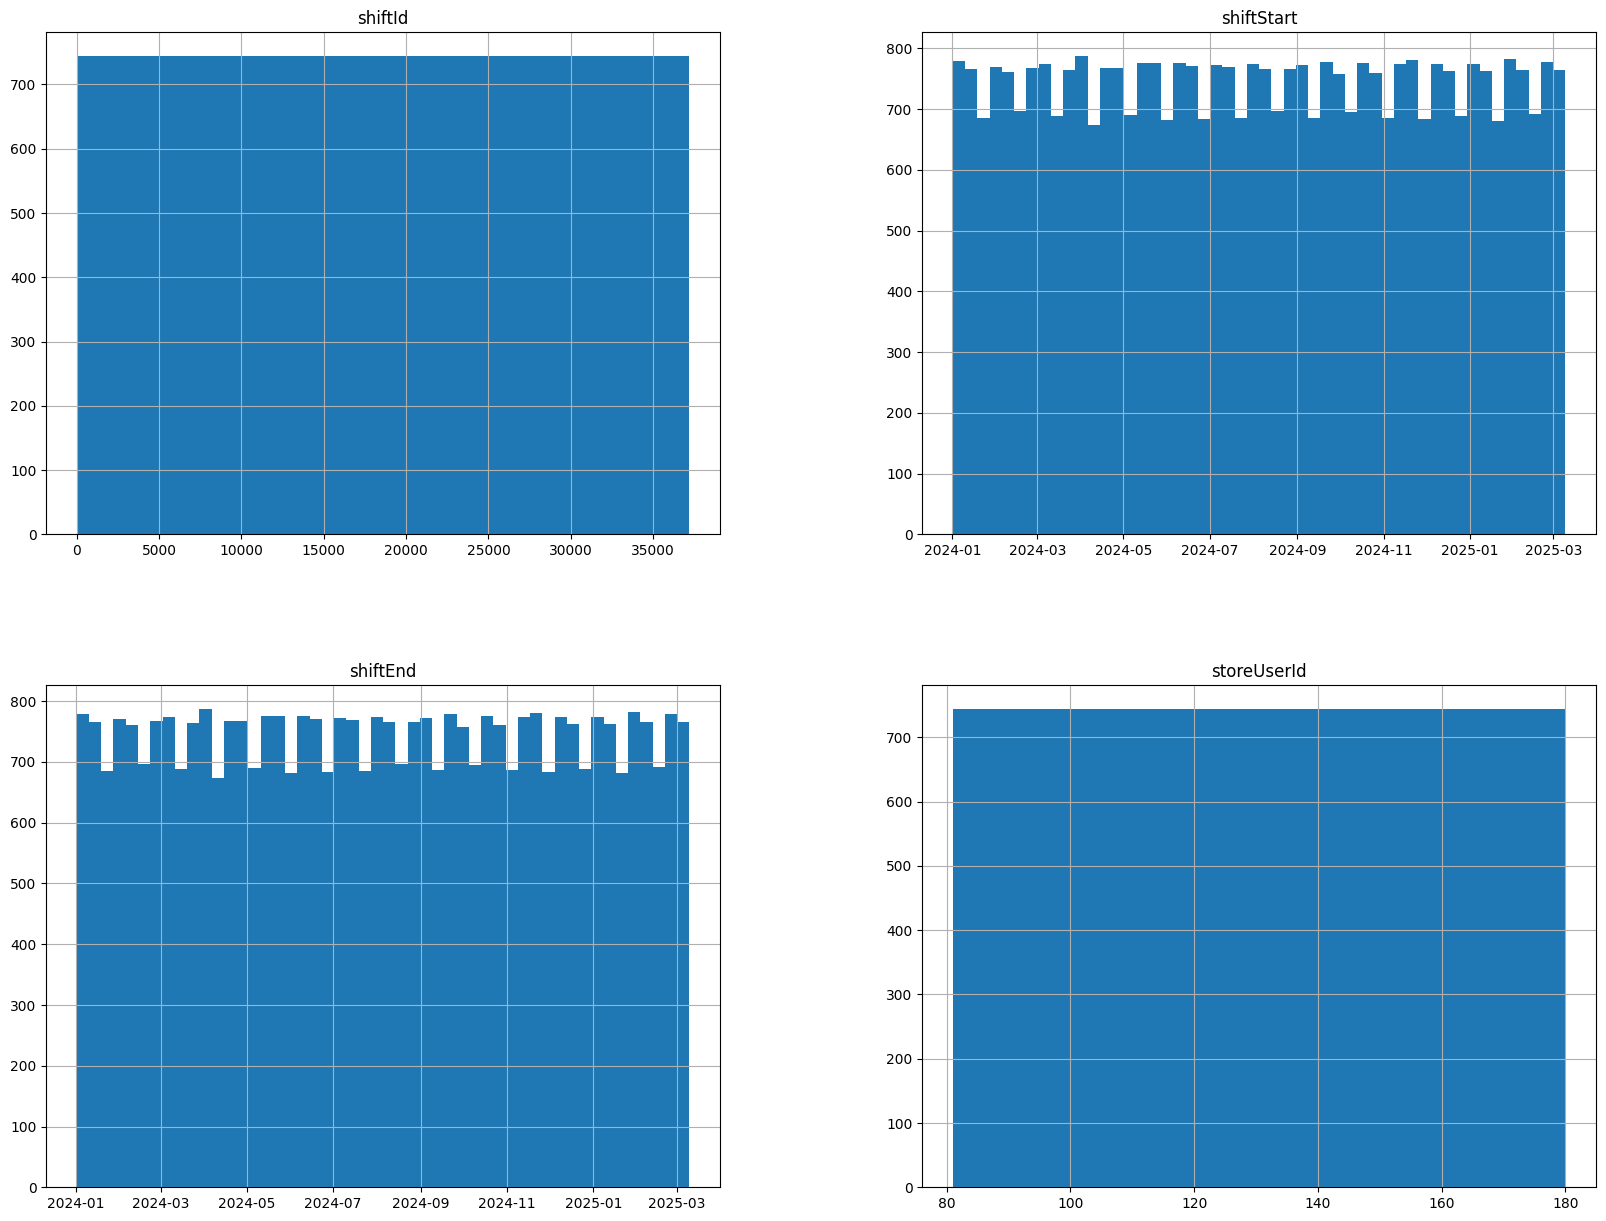

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

shifts_df.hist(bins=50, figsize=(20,15))
plt.show()

### Customers

In [39]:
def generate_customers(users_data, stores_data, store_users_data, total_customers=7000):
    customers_data = []
    customer_id = 1

    cashiers = {user["userId"] for user in users_data if user.get("roleId") == 4}

    store_users_mapping = {}
    for su in store_users_data:
        if su["userId"] in cashiers:
            store_users_mapping.setdefault(su["storeId"], []).append(su)

    for _ in range(total_customers):
        store = random.choice(stores_data)
        store_id = store['storeId']

        if store_id in store_users_mapping:
            store_user = random.choice(store_users_mapping[store_id])
            user_id = store_user['userId']
        else:
            continue

        name = fake.name()
        phone = fake.phone_number()
        choices = ['ACTIVE', 'INACTIVE']
        weights = [0.9, 0.1]
        status = random.choices(choices, weights=weights, k=1)[0]

        customers_data.append({
            "customerId": customer_id,
            "storeId": store_id,
            "userId": user_id,
            "name": fake.first_name() + " " + fake.last_name(),
            "phoneNumber": phone,
            "status": status
        })
        customer_id += 1

    return customers_data


In [40]:
customers_data = generate_customers(users_data, stores_data, store_users_data)
customers_df = pd.DataFrame(customers_data)
customers_df.to_csv('customers.csv', index=False)

In [41]:
customers_df['status'].value_counts()

,count
status,
ACTIVE,6057
INACTIVE,711


In [42]:
customers_df[customers_df['userId'] == 73]

,customerId,storeId,userId,name,phoneNumber,status
1,2,30,73,Balamantri Mahendra,+62 (063) 545 1451,INACTIVE
108,109,30,73,Candra Kuswoyo,(045) 697 0073,ACTIVE
222,223,30,73,Galih Nugroho,(029) 996-2381,INACTIVE
437,438,30,73,Ismail Lestari,(0593) 461-3907,ACTIVE
634,635,30,73,Cinthia Wibowo,(0304) 586 3634,ACTIVE
...,...,...,...,...,...,...
6473,6474,30,73,Nabila Padmasari,+62 (0805) 011-1225,ACTIVE
6478,6479,30,73,Ika Nugroho,+62-68-937-0633,ACTIVE
6490,6491,30,73,Nabila Maryati,(0663) 768 3428,ACTIVE
6513,6514,30,73,Ikin Firmansyah,082 336 7845,ACTIVE


In [43]:
customers_df['userId'].value_counts()

,count
userId,
81,241
82,240
103,232
71,232
157,228
...,...
160,26
107,25
131,23


### Category

In [44]:
product_category_fnb_stores = {
    1: "Daging Beku",
    2: "Makanan Beku",
    3: "Makanan Instant",
    4: "Dessert",
    5: "Ice Cream",
    6: "Menu Sarapan",
    7: "Minuman",
    8: "Nasi Goreng",
    9: "Mie Goreng",
    10: "Kwetiaw",
    11: "Snack",
    12: "Menu Kremes"
}

product_category_fashion_stores = {
    1: "Pakaian Pria",
    2: "Pakaian Wanita",
    3: "Sepatu",
    4: "Sandal",
    5: "Tas",
    6: "Pakaian Bayi",
    7: "Aksesoris",
    8: "Kacamata",
    9: "Jam Tangan",
    10: "Pakaian Anak-anak",
    11: "Pakaian Bayi"
}

product_category_cosmetics_stores = {
    1: "Sabun Wajah",
    2: "Toner",
    3: "Serum",
    4: "Moistruizer",
    5: "Sunscreen Wajah",
    6: "Foundation",
    7: "Bedak",
    8: "Lipstik",
    9: "Maskara",
    10: "Shampoo",
    11: "Conditioner",
    12: "Pomade",
    13: "Parfum",
    14: "Deodoran",
    15: "Sisir",
    16: "Hairdreyer",
    17: "Catokan",
    18: "Hand Cream"
}

product_category_baby_child_stores = {
    1: "Popok Bayi",
    2: "Perlengkapan Mandi",
    3: "Pakaian Bayi",
    4: "Pakaian Anak-anak",
    5: "Susu Formula",
    6: "Makanan Bayi",
    7: "Mainan Edukasi",
    8: "Perlengkapan Makan Bayi",
    9: "Stroller",
    10: "Car Seat"
}

product_category_electronic_stores = {
    1: "Smartphone",
    2: "Laptop",
    3: "Proyektor",
    4: "Kamera",
    5: "Drone",
    6: "Mouse",
    7: "Keyboard",
    8: "Cooling Pad",
    9: "Charger Smartphone",
    10: "Power Bank",
    11: "Earphone",
    12: "Controller",
    13: "Headset",
    14: "Microphone",
    15: "TWS"
}

product_category_household_stores = {
    1: "Peralatan Dapur",
    2: "Alat Kebersihan",
    3: "Dekorasi Rumah",
    4: "Perabotan Kecil",
    5: "Gorden, Karpet & Keset",
    6: "Tempat Penyimpanan"
}

product_category_automotive_stores = {
    1: "Oli dan Cairan Kendaraan",
    2: "Aksesoris Mobil",
    3: "Aksesoris Motor",
    4: "Lampu Kendaraan",
    5: "Ban dan Sparepart",
    6: "Alat Servis Kendaraan",
    7: "Jasa",
}

product_category_algiculture = {
    1: "Pupuk dan Obat Tanaman",
    2: "Benih dan Bibit Tanaman",
    3: "Pakan Ternak",
    4: "Kandang dan Aksesoris Hewan",
    5: "Makanan Hewan Peliharaan",
    6: "Obat dan Vitamin Hewan"
}

product_category_hobby_stores = {
    1: "Mainan Anak",
    2: "Peralatan Olahraga",
    3: "Alat Pancing",
    4: "Teleskop",
    5: "Peralatan Camping",
    6: "Action Figure & Koleksi Hobi"
}

product_category_minimarket_stores = {
    1: "Sembako",
    2: "Makanan Ringan",
    3: "Minuman Kemasan",
    4: "Rokok",
    5: "Kebutuhan sehari-hari",
    6: "Peralatan Mandi & Kebersihan",
    7: "Obat-obatan Ringan",
    8: "Alat Tulis Kantor"
}

product_category_pharmacy_stores = {
    1: "Obat Bebas & Suplemen",
    2: "Alat Kesehatan",
    3: "Minuman Kesehatan",
    4: "Perawatan Luka",
    5: "Produk Kebersihan",
    6: "Alat Bantu Kesehatan"
}

product_category_credit_stores = {
    1: "Pulsa & Paket Data",
    2: "Token Listrik PLN",
    3: "Voucher Game",
    4: "Pembayaran Tagihan",
    5: "E-money & Top-up saldo"
}

category_mapping = {
        "Makanan & Minuman": product_category_fnb_stores,
        "Fashion & Aksesoris": product_category_fashion_stores,
        "Perawatan Diri & Kecantikan": product_category_cosmetics_stores,
        "Elektronik, Gadget & Alat Musik": product_category_electronic_stores,
        "Peralatan Bayi & Anak": product_category_baby_child_stores,
        "Minimarket & Kelontong": product_category_minimarket_stores,
        "Produk Kesehatan": product_category_pharmacy_stores,
        "Pulsa & Layanan": product_category_credit_stores,
        "Perlengkapan Rumah Tangga & Dekorasi": product_category_household_stores,
        "Otomotif & Suku Cadang": product_category_automotive_stores,
        "Pertanian, Peternakan & Toko Hewan": product_category_algiculture,
        "Mainan, Hobi & Peralatan Outdoor": product_category_hobby_stores
    }

In [45]:
def generate_categories(category_mapping):
    categories = []
    category_id_counter = 1
    for i, category_dict in category_mapping.items():
        for i, category_name in category_dict.items():
            categories.append({
                "categoryId": category_id_counter,
                "name": category_name
            })
            category_id_counter += 1
    return categories

In [46]:
categories_data = generate_categories(category_mapping)
categories_df = pd.DataFrame(categories_data)
categories_df.to_csv('categories.csv', index=False)

In [47]:
categories_df

,categoryId,name
0,1,Daging Beku
1,2,Makanan Beku
2,3,Makanan Instant
3,4,Dessert
4,5,Ice Cream
...,...,...
105,106,Peralatan Olahraga
106,107,Alat Pancing
107,108,Teleskop
108,109,Peralatan Camping


### Products

In [48]:
def generate_discount():
    # 80% kemungkinan diskon 0%, 20% kemungkinan diskon antara 1% - 20%
    has_discount = random.choices([0, 1], weights=[80, 20], k=1)[0]
    return 0 if has_discount == 0 else random.randint(1, 20)

In [49]:
def generate_products(stores_data, category_mapping, store_types_dict, categories_data, num_products_per_store_range=(6, 15)):
    products_data = []
    product_id = 1

    # Konversi categories_data ke DataFrame untuk pencarian kategori
    categories_df = pd.DataFrame(categories_data)

    for store in stores_data:
        store_id = store['storeId']
        store_type_id = store['storeTypeId']

        # Ambil tipe toko dari store_types_dict
        if store_type_id in store_types_dict:
            store_type_name = store_types_dict[store_type_id]

            # Ambil kategori produk berdasarkan tipe toko
            if store_type_name in category_mapping:
                product_categories = category_mapping[store_type_name]

                # Jumlah produk per toko secara acak dalam rentang yang diberikan
                num_products = random.randint(*num_products_per_store_range)

                for _ in range(num_products):
                    # Pilih kategori secara acak dari mapping
                    category_name = random.choice(list(product_categories.values()))
                    category_row = categories_df[categories_df['name'] == category_name]

                    if not category_row.empty:
                        category_id = category_row['categoryId'].values[0]
                    else:
                        # Fallback jika kategori tidak ditemukan (harusnya tidak terjadi jika data konsisten)
                        category_id = random.choice(categories_df['categoryId'].tolist())

                    # Nama produk realistis berdasarkan kategori
                    product_name = f"{category_name} {fake.word().capitalize()}"

                    # Tentukan managedBy secara realistis
                    # Misalnya: 70% produk dikelola oleh ADMIN_SCM, 30% oleh SUPER_SCM
                    managed_by = 'ADMIN_SCM' if random.random() < 0.7 else 'SUPER_SCM'

                    # Harga dasar realistis dalam rentang 5.000 - 1.000.000
                    # Menggunakan distribusi yang lebih banyak di harga rendah
                    price_range = random.random()  # Angka acak antara 0.0 - 1.0
                    if price_range < 0.6:  # 60% produk di rentang 5.000 - 100.000
                        base_price = random.randint(5, 100) * 1000
                    elif price_range < 0.9:  # 30% produk di rentang 100.000 - 500.000
                        base_price = random.randint(100, 500) * 1000
                    else:  # 10% produk di rentang 500.000 - 1.000.000
                        base_price = random.randint(500, 1000) * 1000

                    products_data.append({
                        'productId': product_id,  # Menggunakan 'id' sesuai schema Prisma
                        'productCode': f'PRD-{random.randint(100000, 999999):06d}',  # Kode unik realistis
                        'serialNumber': random.randint(100000, 999999) if random.random() < 0.5 else None,  # Opsional
                        'categoryId': category_id,
                        'name': product_name,
                        'description': fake.sentence(nb_words=10),  # Deskripsi realistis
                        'discount': generate_discount(),
                        'basePrice': base_price,
                        'imageUrl': fake.image_url(),
                        'isActive': True,  # Default sesuai schema
                        'managedBy': managed_by,  # Enum ManagedBy
                        'storeId': store_id,  # Relasi ke Store
                        'createdAt': fake.date_time_this_year().isoformat(),  # Waktu realistis
                        'updatedAt': fake.date_time_this_year().isoformat(),
                    })
                    product_id += 1

    print(f"Generated {len(products_data)} products")
    return products_data

In [50]:
products_data = generate_products(stores_data, category_mapping, store_types_dict, categories_data)
products_df = pd.DataFrame(products_data)
products_df.to_csv('products.csv', index=False)

Generated 269 products


In [51]:
products_df

,productId,productCode,serialNumber,categoryId,name,description,discount,basePrice,imageUrl,isActive,managedBy,storeId,createdAt,updatedAt
0,1,PRD-932056,228377.0,38,Sisir Expedita,Odit eaque aspernatur velit doloremque dolorem...,0,164000,https://placekitten.com/601/218,True,SUPER_SCM,1,2025-03-18T23:38:00.349828,2025-01-31T05:48:26.991422
1,2,PRD-651356,NaN,26,Serum Fuga,Dolores reiciendis deserunt ea deleniti nobis ...,0,38000,https://dummyimage.com/633x159,True,ADMIN_SCM,1,2025-03-16T08:53:52.918149,2025-03-14T08:39:42.040399
2,3,PRD-246603,NaN,38,Sisir Nulla,Sapiente repudiandae possimus reprehenderit fu...,18,440000,https://picsum.photos/106/976,True,SUPER_SCM,1,2025-02-24T20:29:35.005201,2025-01-12T02:57:09.060748
3,4,PRD-144855,NaN,28,Sunscreen Wajah Quas,Qui voluptate aliquid dignissimos ut nihil vol...,0,9000,https://dummyimage.com/706x603,True,ADMIN_SCM,1,2025-02-03T04:22:00.668427,2025-02-11T00:52:50.296289
4,5,PRD-549040,NaN,31,Lipstik Eos,Corrupti laudantium ea in assumenda beatae ips...,0,302000,https://placekitten.com/770/149,True,SUPER_SCM,1,2025-03-11T13:49:55.076229,2025-02-02T18:12:50.196378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,265,PRD-512646,NaN,83,Voucher Game Quod,Eveniet inventore voluptas deleniti repellat q...,20,301000,https://dummyimage.com/263x625,True,ADMIN_SCM,30,2025-01-12T11:31:42.476656,2025-01-01T07:59:24.136689
265,266,PRD-317781,972420.0,84,Pembayaran Tagihan Provident,Ipsa illo aperiam autem eveniet atque recusand...,0,54000,https://dummyimage.com/274x823,True,ADMIN_SCM,30,2025-01-16T06:48:34.927716,2025-02-20T21:13:47.036408
266,267,PRD-229642,NaN,84,Pembayaran Tagihan Earum,Dolore aliquam dolorem culpa placeat incidunt ...,0,79000,https://placekitten.com/385/76,True,SUPER_SCM,30,2025-03-24T12:22:36.736091,2025-03-03T17:57:26.708254
267,268,PRD-991978,344419.0,83,Voucher Game Nemo,Sed excepturi nostrum quae necessitatibus illu...,0,50000,https://picsum.photos/400/427,True,ADMIN_SCM,30,2025-03-19T08:21:03.269611,2025-01-25T23:16:22.754741


In [52]:
products_df.describe()

,productId,serialNumber,categoryId,discount,basePrice,storeId
count,269.000000,117.000000,269.000000,269.000000,269.000000,269.000000
mean,135.000000,521538.760684,72.929368,1.869888,194754.646840,16.007435
std,77.797815,272275.399184,32.767934,4.371057,221455.529435,8.699800
min,1.000000,118533.000000,1.000000,0.000000,5000.000000,1.000000
25%,68.000000,279732.000000,38.000000,0.000000,47000.000000,9.000000
50%,135.000000,475830.000000,87.000000,0.000000,88000.000000,17.000000
75%,202.000000,768181.000000,97.000000,0.000000,300000.000000,24.000000
max,269.000000,993568.000000,109.000000,20.000000,990000.000000,30.000000


### Variant Types

In [53]:
variant_types = {
    "FNB": ["Rasa", "Ukuran", "Kemasan"],
    "Fashion": ["Warna", "Ukuran", "Bahan"],
    "Cosmetics": ["Tipe", "Kandungan", "Aroma"],
    "Baby & Child": ["Ukuran", "Bahan", "Merek"],
    "Electronics": ["Warna", "Kapasitas", "Tipe"],
    "Household": ["Warna", "Ukuran", "Material"],
    "Automotive": ["Jenis", "Warna", "Merek"],
    "Agriculture": ["Jenis", "Berat", "Kemasan"],
    "Hobby": ["Jenis", "Ukuran", "Merek"],
    "Minimarket": ["Ukuran", "Rasa", "Kemasan"],
    "Pharmacy": ["Dosis", "Kemasan", "Tipe"],
    "Credit": ["Nominal", "Operator", "Jenis"]
}

In [54]:
def generate_variant_types():
    variant_types_data = []
    variant_types_id = 1

    for variant_type in set([vt for sublist in variant_types.values() for vt in sublist]):
        variant_types_data.append({
            'variantTypeId': variant_types_id,
            'name': variant_type
        })
        variant_types_id += 1
    return variant_types_data

In [55]:
variant_types_data = generate_variant_types()
variant_types_df = pd.DataFrame(variant_types_data)
variant_types_df.to_csv('variant_types.csv', index=False)

In [56]:
variant_types_df

,variantTypeId,name
0,1,Berat
1,2,Nominal
2,3,Rasa
3,4,Kemasan
4,5,Ukuran
5,6,Kandungan
6,7,Material
7,8,Dosis
8,9,Kapasitas
9,10,Operator


### Variant Options

In [57]:
variant_options = {
    "Rasa": ["Manis", "Asin", "Pedas", "Gurih"],
    "Ukuran": ["S", "M", "L", "XL"],
    "Kemasan": ["Plastik", "Karton", "Botol", "Kaleng"],
    "Warna": ["Merah", "Biru", "Hitam", "Putih", "Hijau"],
    "Bahan": ["Katun", "Denim", "Linen", "Sutra"],
    "Tipe": ["Cair", "Padat", "Spray"],
    "Kapasitas": ["16GB", "32GB", "64GB", "128GB"],
    "Material": ["Kayu", "Besi", "Plastik", "Aluminium"],
    "Merek": ["Brand A", "Brand B", "Brand C"],
    "Berat": ["250gr", "500gr", "1kg", "5kg"],
    "Dosis": ["100mg", "250mg", "500mg"],
    "Nominal": ["10.000", "25.000", "50.000", "100.000"],
    "Operator": ["Telkomsel", "XL", "Indosat", "Tri"],
    "Jenis": ["Elektrik", "Manual", "Digital", "Hybrid"],
    "Kandungan": ["Vitamin C", "Kolagen", "Hyaluronic Acid"],
    "Aroma": ["Floral", "Buah", "Vanilla"]
}

In [58]:
def generate_variant_options(variant_types_data):
    variant_options_data = []
    variant_option_id = 1

    for variant_type_name, options in variant_options.items():
        variant_type_id = None
        for variant_type in variant_types_data:
            if variant_type['name'] == variant_type_name:
                variant_type_id = variant_type['variantTypeId']
                break

        if variant_type_id is None:
            print(f'Tidak ditemukan variant_type untuk {variant_type_name}')
            continue

        for option_name in options:
            price = random.randint(1000, 50000)
            choices = ['ACTIVE', 'INACTIVE']
            weights = [0.8, 0.2]
            status = random.choices(choices, weights=weights, k=1)[0]
            variant_options_data.append({
                'variantOptionId': variant_option_id,
                'variantTypeId': variant_type_id,
                'name': option_name,
                'price': price,
                'status': status
            })
            variant_option_id += 1

    return variant_options_data

In [59]:
variant_options_data = generate_variant_options(variant_types_data)
variant_options_df = pd.DataFrame(variant_options_data)
variant_options_df.to_csv('variant_options.csv', index=False)

In [60]:
variant_options_df

,variantOptionId,variantTypeId,name,price,status
0,1,3,Manis,27293,ACTIVE
1,2,3,Asin,29793,INACTIVE
2,3,3,Pedas,25827,ACTIVE
3,4,3,Gurih,25668,ACTIVE
4,5,5,S,47299,ACTIVE
5,6,5,M,26536,ACTIVE
6,7,5,L,8503,ACTIVE
7,8,5,XL,39827,INACTIVE
8,9,4,Plastik,5279,ACTIVE
9,10,4,Karton,25795,ACTIVE


### Variants dan Variant Option Variants

In [61]:
category_to_variant = {
    "Makanan & Minuman": "FNB",
    "Fashion & Aksesoris": "Fashion",
    "Perawatan Diri & Kecantikan": "Cosmetics",
    "Elektronik, Gadget & Alat Musik": "Electronics",
    "Peralatan Bayi & Anak": "Baby & Child",
    "Minimarket & Kelontong": "Minimarket",
    "Produk Kesehatan": "Pharmacy",
    "Pulsa & Layanan": "Credit",
    "Perlengkapan Rumah Tangga & Dekorasi": "Household",
    "Otomotif & Suku Cadang": "Automotive",
    "Pertanian, Peternakan & Toko Hewan": "Agriculture",
    "Mainan, Hobi & Peralatan Outdoor": "Hobby"
}

In [62]:
def find_main_category(product_category):
    for main_category, sub_categories in category_mapping.items():
        if product_category in sub_categories.values():
            return main_category
    return None

In [63]:
def generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data):
    variants_data = []
    variant_option_variants_data = []
    variant_id = 1
    variant_option_variant_id = 1

    # Pastikan variant_options_data dalam bentuk list
    variant_options_data = list(variant_options_data)

    product_category_merge = products_df.merge(categories_df, on='categoryId', how='left')

    for _, row in product_category_merge.iterrows():
        product_id = row['productId']
        category_name = row['name_y']

        print(f"Product ID: {product_id}, Category: {category_name}")

        main_category = find_main_category(category_name)
        if not main_category or main_category not in category_to_variant:
            print(f"  -> Main category tidak ditemukan atau tidak ada di category_to_variant: {main_category}")
            continue

        variant_category = category_to_variant[main_category]
        if variant_category not in variant_types:
            print(f"  -> Variant category tidak ada di variant_types: {variant_category}")
            continue

        possible_variant_types = variant_types[variant_category]
        num_variants = random.randint(1, len(possible_variant_types))  # 1 atau lebih tipe varian
        selected_variant_types = random.sample(possible_variant_types, num_variants)

        print(f"  -> Variant Category: {variant_category}, Possible Types: {possible_variant_types}, Selected Types: {selected_variant_types}")

        # Tambahkan entri ke variants_data untuk setiap tipe varian yang dipilih
        for variant_type in selected_variant_types:
            variants_data.append({
                'variantId': variant_id,
                'productId': product_id
            })

        # Reset daftar opsi untuk debugging
        added_options = []

        for variant_type in selected_variant_types:
            if variant_type in variant_options:
                print(f"    -> Variant Type: {variant_type}, Available Options: {variant_options[variant_type]}")
                for option_name in variant_options[variant_type]:
                    # Cari opsi yang cocok di variant_options_data
                    matching_option = next((opt for opt in variant_options_data if opt['name'] == option_name), None)
                    if matching_option:
                        variant_option_variants_data.append({
                            'variantOptionVariantId': variant_option_variant_id,
                            'variantId': variant_id,
                            'variantOptionId': matching_option['variantOptionId']
                        })
                        added_options.append(option_name)
                        print(f"      -> Added Option: {option_name} (variantOptionId: {matching_option['variantOptionId']})")
                        variant_option_variant_id += 1
                    else:
                        print(f"      -> Option {option_name} tidak ditemukan di variant_options_data")
            else:
                print(f"    -> Variant Type {variant_type} tidak ada di variant_options")

        # Debugging: Cek semua opsi yang ditambahkan untuk variant ini
        print(f"  -> Total Options Added for variantId {variant_id}: {len(added_options)} - {added_options}")

        variant_id += 1

    return variants_data, variant_option_variants_data

In [64]:
variants_data, variant_option_variants_data = generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data)
variants_df = pd.DataFrame(variants_data)
variant_option_variants_df = pd.DataFrame(variant_option_variants_data)
variants_df.to_csv('variants.csv', index=False)
variant_option_variants_df.to_csv('variant_option_variants.csv', index=False)

Product ID: 1, Category: Sisir
  -> Variant Category: Cosmetics, Possible Types: ['Tipe', 'Kandungan', 'Aroma'], Selected Types: ['Tipe', 'Aroma']
    -> Variant Type: Tipe, Available Options: ['Cair', 'Padat', 'Spray']
      -> Added Option: Cair (variantOptionId: 22)
      -> Added Option: Padat (variantOptionId: 23)
      -> Added Option: Spray (variantOptionId: 24)
    -> Variant Type: Aroma, Available Options: ['Floral', 'Buah', 'Vanilla']
      -> Added Option: Floral (variantOptionId: 58)
      -> Added Option: Buah (variantOptionId: 59)
      -> Added Option: Vanilla (variantOptionId: 60)
  -> Total Options Added for variantId 1: 6 - ['Cair', 'Padat', 'Spray', 'Floral', 'Buah', 'Vanilla']
Product ID: 2, Category: Serum
  -> Variant Category: Cosmetics, Possible Types: ['Tipe', 'Kandungan', 'Aroma'], Selected Types: ['Aroma']
    -> Variant Type: Aroma, Available Options: ['Floral', 'Buah', 'Vanilla']
      -> Added Option: Floral (variantOptionId: 58)
      -> Added Option: Bua

In [65]:
variants_df

,variantId,productId
0,1,1
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
522,267,267
523,268,268
524,269,269
525,269,269


In [66]:
variant_option_variants_df

,variantOptionVariantId,variantId,variantOptionId
0,1,1,22
1,2,1,23
2,3,1,24
3,4,1,58
4,5,1,59
...,...,...,...
2047,2048,269,54
2048,2049,269,47
2049,2050,269,8
2050,2051,269,49


In [67]:
variant_option_variants_df[variant_option_variants_df['variantId'] == 243]

,variantOptionVariantId,variantId,variantOptionId
1858,1859,243,13
1859,1860,243,14
1860,1861,243,15
1861,1862,243,16
1862,1863,243,17


### Payment Methods

In [68]:
payment_methods = {
    'BRI': 'YES',
    'Cash': 'NO',
    'QRIS': 'YES',
    'DANA': 'YES',
    'OVO': 'YES',
    'Mandiri': 'YES',
    'BNI': 'YES'
}

In [69]:
def generate_payment_methods():
    payment_methods_data = []
    payment_method_id = 1

    for name, is_cash in payment_methods.items():
        payment_methods_data.append({
            'paymentMethodId': payment_method_id,
            'name': name,
            'image': fake.image_url(),
            'isCash': is_cash
        })
        payment_method_id += 1

    return payment_methods_data

In [70]:
payment_methods_data = generate_payment_methods()
payment_methods_df = pd.DataFrame(payment_methods_data)
payment_methods_df.to_csv('payment_methods.csv', index=False)

In [71]:
payment_methods_df

,paymentMethodId,name,image,isCash
0,1,BRI,https://dummyimage.com/792x986,YES
1,2,Cash,https://placekitten.com/384/623,NO
2,3,QRIS,https://picsum.photos/310/824,YES
3,4,DANA,https://placekitten.com/896/323,YES
4,5,OVO,https://picsum.photos/279/27,YES
5,6,Mandiri,https://placekitten.com/654/536,YES
6,7,BNI,https://placekitten.com/572/238,YES


### Transactions

In [72]:
taxes = {
    'PPn': 12,
    'PPh': 0.5,
    'Pajak Daerah': 2
}

national_holidays = {
    # 2024
    datetime(2024, 1, 1): "Tahun Baru Masehi",
    datetime(2024, 2, 8): "Isra Mi'raj",
    datetime(2024, 2, 9): "Cuti Bersama Tahun Baru Imlek",
    datetime(2024, 2, 10): "Tahun Baru Imlek",
    datetime(2024, 2, 14): "Hari Pemungutan Suara",
    datetime(2024, 3, 11): "Hari Suci Nyepi",
    datetime(2024, 3, 12): "Cuti Bersama Hari Suci Nyepi",
    datetime(2024, 3, 29): "Jumat Agung",
    datetime(2024, 4, 8): "Cuti Bersama Lebaran",
    datetime(2024, 4, 9): "Cuti Bersama Lebaran",
    datetime(2024, 4, 10): "Hari Raya Idul Fitri",
    datetime(2024, 4, 11): "Cuti Bersama Lebaran",
    datetime(2024, 4, 12): "Cuti Bersama Lebaran",
    datetime(2024, 4, 15): "Cuti Bersama Lebaran",
    datetime(2024, 5, 1): "Hari Buruh",
    datetime(2024, 5, 9): "Kenaikan Isa Almasih",
    datetime(2024, 5, 10): "Cuti Bersama Kenaikan Isa Almasih",
    datetime(2024, 5, 23): "Hari Waisak",
    datetime(2024, 5, 24): "Cuti Bersama Hari Waisak",
    datetime(2024, 6, 1): "Hari Lahir Pancasila",
    datetime(2024, 6, 17): "Idul Adha",
    datetime(2024, 6, 18): "Cuti Bersama Idul Adha",
    datetime(2024, 7, 7): "Tahun Baru Islam",
    datetime(2024, 8, 17): "Hari Kemerdekaan",
    datetime(2024, 9, 16): "Maulid Nabi Muhammad SAW",
    datetime(2024, 11, 27): "Hari Libur Pilkada",
    datetime(2024, 12, 25): "Hari Natal",
    datetime(2024, 12, 26): "Cuti Bersama Hari Natal",
    # 2025
    datetime(2025, 1, 1): "Tahun Baru Masehi",
    datetime(2025, 1, 27): "Isra Mi'raj",
    datetime(2025, 1, 28): "Cuti Bersama Tahun Baru Imlek",
    datetime(2025, 1, 29): "Tahun Baru Imlek",
    datetime(2025, 3, 28): "Cuti Bersama Hari Suci Nyepi",
    datetime(2025, 3, 29): "Hari Suci Nyepi",
    datetime(2025, 3, 31): "Hari Raya Idul Fitri",
    datetime(2025, 4, 1): "Cuti Bersama Lebaran",
    datetime(2025, 4, 2): "Cuti Bersama Lebaran",
    datetime(2025, 4, 3): "Cuti Bersama Lebaran",
    datetime(2025, 4, 4): "Cuti Bersama Lebaran",
    datetime(2025, 4, 7): "Cuti Bersama Lebaran"
}

In [73]:
def weighted_transactions_time(shift_start, shift_end, store_type_id):
    hour_weights_by_store_type = {
        1: {11: 20, 12: 25, 13: 20, 17: 15, 18: 20, 19: 25, 20: 15},  # Makanan & Minuman
        2: {10: 15, 11: 20, 14: 20, 15: 25, 16: 25, 17: 20},         # Fashion
        3: {9: 15, 10: 20, 11: 20, 16: 20, 17: 25, 18: 20},          # Kecantikan
        4: {10: 15, 11: 20, 14: 20, 15: 25, 16: 20},                # Elektronik
        5: {9: 15, 10: 20, 11: 20, 14: 20, 15: 20},                 # Rumah Tangga
        6: {8: 15, 9: 20, 10: 20, 14: 20, 15: 15},                  # Otomotif
        7: {7: 20, 8: 25, 9: 20, 10: 15},                           # Pertanian
        8: {10: 15, 11: 20, 14: 20, 15: 25, 16: 25},                # Hobi
        9: {9: 15, 10: 20, 11: 20, 14: 20, 15: 20},                 # Bayi
        10: {0: 5, 1: 5, 7: 15, 8: 20, 9: 20, 17: 25, 18: 25, 19: 20, 20: 15, 21: 10, 22: 5},  # Minimarket
        11: {8: 20, 9: 25, 10: 20, 14: 15, 15: 15},                 # Kesehatan
        12: {8: 15, 9: 20, 10: 20, 17: 20, 18: 20}                  # Pulsa
    }

    day_weights_by_store_type = {
        1: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 20},
        2: {0: 5, 1: 5, 2: 5, 3: 5, 4: 15, 5: 20, 6: 15},
        3: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 15},
        4: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 15, 6: 10},
        5: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 15},
        6: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 10, 6: 5},
        7: {0: 15, 1: 15, 2: 10, 3: 10, 4: 10, 5: 5, 6: 5},
        8: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 20, 6: 25},
        9: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 15},
        10: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 20, 6: 20},
        11: {0: 15, 1: 15, 2: 10, 3: 10, 4: 10, 5: 5, 6: 5},
        12: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 15, 6: 15}
    }

    payday_weights = {day: 25 if 1 <= day <= 5 else 5 for day in range(1, 32)}
    month_weights_by_store_type = {
        1: {3: 20, 4: 20, 12: 15},
        2: {12: 20},
        3: {12: 15},
        4: {12: 15},
        5: {12: 20},
        6: {},
        7: {3: 15, 4: 15},
        8: {12: 20},
        9: {12: 15},
        10: {3: 20, 4: 20, 12: 15},
        11: {3: 15, 4: 15},
        12: {}
    }

    all_hours = list(range(shift_start.hour, shift_end.hour + 1))
    if shift_end.hour < shift_start.hour:  # Shift lintas hari
        all_hours = list(range(shift_start.hour, 24)) + list(range(0, shift_end.hour + 1))
    hour_weights = hour_weights_by_store_type.get(store_type_id, {8: 10, 9: 10, 12: 15, 13: 14, 17: 20, 18: 20})
    hour_probability = [hour_weights.get(h, 5) for h in all_hours]

    delta = (shift_end - shift_start).days
    if delta < 0:  # Shift dalam satu hari
        delta = (shift_end - shift_start).total_seconds() / 86400
    random_day = shift_start + timedelta(days=random.randint(0, max(0, int(delta))))

    holiday_factor = 1.5 if random_day.date() in [d.date() for d in national_holidays.keys()] else 1.0
    if store_type_id in [1, 10] and "Natal" in national_holidays.get(random_day.date(), ""):
        holiday_factor = 2.0

    day_weights = day_weights_by_store_type.get(store_type_id, {0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 10, 6: 15})
    weighted_day = random.choices(list(day_weights.keys()), weights=[w * holiday_factor for w in day_weights.values()], k=1)[0]
    random_day = random_day + timedelta(days=(weighted_day - random_day.weekday()) % 7)

    day_of_month = random_day.day
    if random.random() < (payday_weights[day_of_month] / 25):
        random_day = random_day.replace(day=random.randint(1, 5))

    month = random_day.month
    month_factor = month_weights_by_store_type.get(store_type_id, {}).get(month, 10) / 10
    if random.random() < month_factor - 1:
        random_day = random_day.replace(month=month)

    hour = random.choices(all_hours, weights=hour_probability, k=1)[0]
    minute = random.randint(0, 59)
    second = random.randint(0, 59)

    return random_day.replace(hour=hour, minute=minute, second=second)

In [74]:
def get_store_operation_hours(store_type_id):
    if store_type_id in [10, 11]:  # Minimarket & Kesehatan
        rand = random.random()
        if rand < 0.6:
            return 12
        elif rand < 0.9:
            return 8
        else:
            return 24
    else:
        return 8 if random.random() < 0.7 else 12

In [75]:
def generate_transactions(
        shifts_df,
        customers_df,
        products_df,
        variants_df,
        variant_options_df,
        variant_option_variants_df,
        payment_methods_df,
        store_users_df,
        users_df,
        stores_df,
        store_ids=None
    ):
    transactions_data = []
    transaction_details_data = []
    transaction_id = 1
    transaction_detail_id = 1

    start_date = datetime(2024, 1, 1)  # 1 tahun dari sekarang ke belakang
    end_date = datetime(2025, 3, 19)

    customers_by_store = customers_df.groupby('storeId')
    cashier_users = users_df[users_df['roleId'] == 4]
    cashier_store_users = store_users_df[store_users_df['userId'].isin(cashier_users['userId'])]

    if store_ids is not None:
        store_ids = [store_ids] if isinstance(store_ids, int) else store_ids
        cashier_store_users = cashier_store_users[cashier_store_users['storeId'].isin(store_ids)]

    cashier_store_users_by_store = cashier_store_users.groupby('storeId')
    valid_store_user_ids = cashier_store_users['storeUserId']
    shifts_df = shifts_df[shifts_df['storeUserId'].isin(valid_store_user_ids)]
    shifts_by_store_user = shifts_df.groupby('storeUserId')

    store_operation_hours = {store["storeId"]: get_store_operation_hours(store["storeTypeId"]) for store in stores_df.to_dict('records')}

    for store_id, store_cashiers in cashier_store_users_by_store:
        store_type_id = stores_df.loc[stores_df['storeId'] == store_id, 'storeTypeId'].iloc[0]
        operation_hours = store_operation_hours[store_id]

        # Tentukan target transaksi berdasarkan tipe toko dan jam operasional
        if store_type_id in [10, 11] and operation_hours == 24:
            target_transactions = random.randint(15000, 30000)  # Minimarket/Kesehatan 24 jam
        elif store_type_id in [10, 11]:
            target_transactions = random.randint(5000, 15000)  # Minimarket/Kesehatan 8-12 jam
        else:
            target_transactions = random.randint(3000, 10000)  # Toko kecil

        store_transaction_count = 0
        store_customers = customers_by_store.get_group(store_id) if store_id in customers_by_store.groups else pd.DataFrame()
        store_products_df = products_df[products_df['storeId'] == store_id]

        if store_products_df.empty:
            print(f"Tidak ada produk untuk store_id {store_id}. Skip.")
            continue

        # Distribusikan transaksi ke setiap shift
        store_shifts = shifts_df[shifts_df['storeUserId'].isin(store_cashiers['storeUserId'])]
        if store_shifts.empty:
            continue

        # Hitung transaksi harian rata-rata
        days_operational = 312  # Asumsi tutup 1 hari/minggu
        avg_daily_transactions = target_transactions // days_operational
        cashier_count = len(store_cashiers)

        for _, shift in store_shifts.iterrows():
            shift_start = pd.to_datetime(shift['shiftStart'])
            shift_end = pd.to_datetime(shift['shiftEnd'])
            shift_date = shift_start.date()
            is_weekend = shift_date.weekday() >= 5
            is_holiday = shift_date in [d.date() for d in national_holidays.keys()]

            # Tentukan jumlah transaksi per shift
            base_transactions = avg_daily_transactions // (24 // operation_hours) // cashier_count
            daily_factor = 1.3 if is_weekend else 1.0
            holiday_factor = 1.5 if is_holiday and store_type_id in [1, 10] else 1.0
            shift_transactions = int(base_transactions * daily_factor * holiday_factor)
            shift_transactions = max(1, min(shift_transactions, 50))  # Batasi 1-50 per shift

            for _ in range(shift_transactions):
                if store_transaction_count >= target_transactions:
                    break

                # Tentukan apakah transaksi oleh member atau non-member (misal: 70% member, 30% non-member)
                is_member = random.random() < 0.7
                if is_member and not store_customers.empty:
                    customer_id = store_customers.sample(n=1)['customerId'].iloc[0]
                else:
                    customer_id = None  # Pelanggan tidak terdaftar sebagai member

                user_id = store_cashiers.sample(n=1)['userId'].iloc[0]
                payment_method = payment_methods_df.sample(n=1).iloc[0]
                payment_method_id = payment_method['paymentMethodId']
                is_cash = payment_method['isCash']

                transaction_date = weighted_transactions_time(shift_start, shift_end, store_type_id)
                num_products = random.randint(1, 5)
                selected_products = store_products_df.sample(n=min(num_products, len(store_products_df))).to_dict('records')
                subtotal_all = 0

                for product in selected_products:
                    product_id = product['productId']
                    available_variants = variants_df[variants_df['productId'] == product_id]
                    if not available_variants.empty:
                        variant = available_variants.sample(n=1).iloc[0]
                        variant_id = variant['variantId']
                        available_options = variant_option_variants_df[
                            variant_option_variants_df['variantId'] == variant_id
                        ]
                        if not available_options.empty:
                            variant_option = available_options.sample(n=1).iloc[0]
                            variant_option_id = variant_option['variantOptionId']

                            product_quantity = random.randint(1, 5)
                            product_price = product['basePrice']
                            variant_option_data = variant_options_df[
                                variant_options_df['variantOptionId'] == variant_option_id
                            ].iloc[0]
                            variant_price = variant_option_data['price']

                            subtotal = (product_price + variant_price) * product_quantity
                            subtotal_all += subtotal

                            transaction_details_data.append({
                                'transactionDetailId': transaction_detail_id,
                                'transactionId': transaction_id,
                                'productId': product_id,
                                'variantId': variant_id,
                                'quantity': product_quantity,
                                'subtotal': subtotal
                            })
                            transaction_detail_id += 1

                tax_amount = sum(subtotal_all * (rate / 100) for rate in taxes.values())
                total_amount = subtotal_all + tax_amount
                discount = random.randint(0, int(total_amount * 0.1))
                total_amount -= discount

                if is_cash == "YES":
                    cash = total_amount + random.randint(0, 5000)
                    change = cash - total_amount
                else:
                    cash = total_amount
                    change = 0

                transactions_data.append({
                    'transactionId': transaction_id,
                    'invoiceId': f'INV-{random.randint(100000000000, 999999999999)}',
                    'customerId': customer_id,  # Bisa None untuk non-member
                    'userId': user_id,
                    'storeId': store_id,
                    'paymentMethodId': payment_method_id,
                    'totalAmount': total_amount,
                    'cash': cash,
                    'change': change,
                    'discount': discount,
                    'transactionDate': transaction_date,
                    'status': 'COMPLETED'
                })
                transaction_id += 1
                store_transaction_count += 1

        print(f"Selesai generate {store_transaction_count} transaksi untuk store_id {store_id}")

    return transactions_data, transaction_details_data

In [76]:
transactions_data, transaction_details_data = generate_transactions(
    shifts_df, customers_df, products_df, variants_df, variant_options_df,
    variant_option_variants_df, payment_methods_df, store_users_df, users_df,
    stores_df
)

transactions_df = pd.DataFrame(transactions_data)
transaction_details_df = pd.DataFrame(transaction_details_data)
transactions_df.to_csv('transactions.csv', index=False)
transaction_details_df.to_csv('transaction_details.csv', index=False)

Selesai generate 1965 transaksi untuk store_id 1
Selesai generate 3178 transaksi untuk store_id 2
Selesai generate 1860 transaksi untuk store_id 3
Selesai generate 2232 transaksi untuk store_id 4
Selesai generate 4796 transaksi untuk store_id 5
Selesai generate 2604 transaksi untuk store_id 6
Selesai generate 4771 transaksi untuk store_id 7
Selesai generate 2976 transaksi untuk store_id 8
Selesai generate 2232 transaksi untuk store_id 9
Selesai generate 1488 transaksi untuk store_id 10
Selesai generate 3933 transaksi untuk store_id 11
Selesai generate 2976 transaksi untuk store_id 12
Selesai generate 2232 transaksi untuk store_id 13
Selesai generate 2232 transaksi untuk store_id 14
Selesai generate 3198 transaksi untuk store_id 15
Selesai generate 2232 transaksi untuk store_id 16
Selesai generate 1116 transaksi untuk store_id 17
Selesai generate 1860 transaksi untuk store_id 18
Selesai generate 2232 transaksi untuk store_id 19
Selesai generate 2341 transaksi untuk store_id 20
Selesai g

In [77]:
transactions_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discount,transactionDate,status
0,1,INV-312080296285,6621.0,103,1,2,72486.990,72486.990,0.0,3612,2024-01-04 11:04:25,COMPLETED
1,2,INV-330826466381,2206.0,103,1,3,1519786.460,1520360.460,574.0,83612,2024-01-06 15:17:56,COMPLETED
2,3,INV-198782948493,5642.0,103,1,7,1054070.930,1054380.930,310.0,34634,2024-01-06 15:38:58,COMPLETED
3,4,INV-281961827373,6412.0,103,1,4,1166061.710,1169257.710,3196.0,40766,2024-01-07 10:39:05,COMPLETED
4,5,INV-642730245466,763.0,103,1,6,3651546.910,3653848.910,2302.0,189880,2024-01-07 11:09:53,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
79907,79908,INV-833737398484,6245.0,104,30,6,623820.575,624404.575,584.0,56464,2025-03-07 11:31:10,COMPLETED
79908,79909,INV-556659337170,4433.0,136,30,6,100805.635,102176.635,1371.0,6553,2025-03-07 18:39:06,COMPLETED
79909,79910,INV-595348366055,NaN,136,30,2,532094.410,532094.410,0.0,22152,2025-03-03 18:29:27,COMPLETED
79910,79911,INV-101980012870,1490.0,73,30,5,2431300.175,2432865.175,1565.0,252368,2025-03-03 18:39:32,COMPLETED


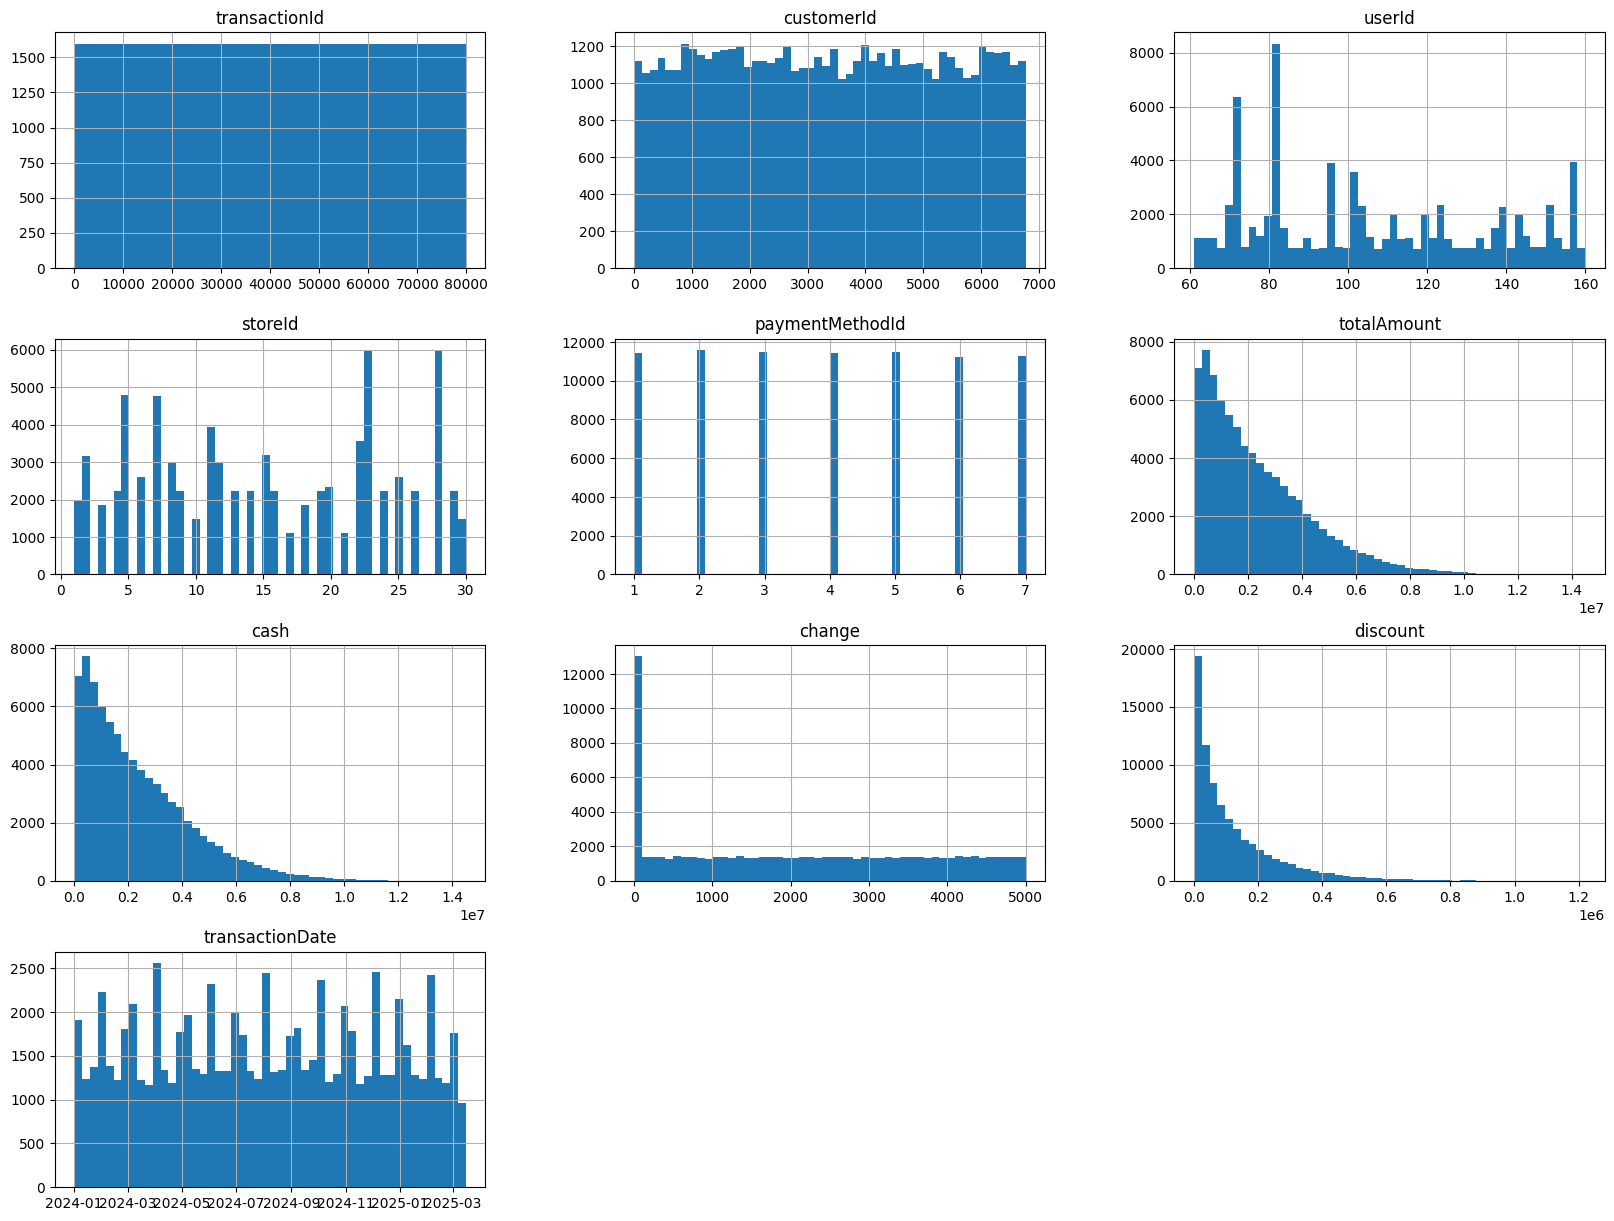

In [78]:
transactions_df.hist(bins=50, figsize=(20,15))
plt.show()

In [79]:
transaction_details_df

,transactionDetailId,transactionId,productId,variantId,quantity,subtotal
0,1,1,2,2,1,66462
1,2,2,7,7,1,91285
2,3,2,10,10,3,407790
3,4,2,1,1,2,334570
4,5,2,9,9,4,301848
...,...,...,...,...,...,...
240142,240143,79910,269,269,1,484058
240143,240144,79911,269,269,5,2343815
240144,240145,79912,268,268,2,188342
240145,240146,79912,264,264,2,963516


In [80]:
transactions_df['userId'].value_counts()

,count
userId,
82,6000
71,5992
157,3562
101,3198
95,3178
...,...
118,346
117,345
154,341


### User Activity

In [81]:
actions = [
    'Login', 'Logout', 'Tambah Produk', 'Edit Produk', 'Checkout',
    'cancel order', 'update profile', 'Transaksi'
]

In [82]:
def generate_activity_users(store_users_df, num_records=100):
    activity_data = []

    for i in range(num_records):
        store_user = store_users_df.sample(n=1).iloc[0]
        user_id = store_user['userId']
        store_id = store_user['storeId']

        action = random.choice(actions)

        action_time = fake.date_time_between(start_date="-30d", end_date="now")

        activity_data.append({
            'userActivityId': i + 1,
            'userId': user_id,
            'storeId': store_id,
            'action': action,
            'actionTime': action_time
        })
    return activity_data

In [83]:
activity_data = generate_activity_users(store_users_df, num_records=100)
activity_df = pd.DataFrame(activity_data)
activity_df.to_csv('user_activity.csv', index=False)

### Store Bill

In [84]:
bills = [
    'listrik', 'air', 'pajak', 'es batu', 'hutang piutang', 'perawatan alat',
    'biaya sewa', 'ganti lampu', 'beli meja'
]

statuses = [
    'PAID', 'UNPAID'
]

def generate_store_bills(stores_data):
    store_bills_data = []
    store_bill_id = 1

    for store in stores_data:
        store_id = store['storeId']
        num_bills = random.randint(2, 5)

        for _ in range(num_bills):
            bill_name = random.choice(bills)
            status = random.choice(statuses)
            on_date = datetime.now() - timedelta(days=random.randint(0, 30))

            store_bills_data.append({
                'storeBillsId': store_bill_id,
                'storeId': store_id,
                'name': bill_name,
                'status': status,
                "onDate": on_date.strftime("%Y-%m-%d %H:%M:%S")
            })
            store_bill_id += 1
    return store_bills_data

In [85]:
store_bills_data = generate_store_bills(stores_data)
store_bills_df = pd.DataFrame(store_bills_data)
store_bills_df.to_csv('store_bills.csv', index=False)

In [86]:
store_bills_df

,storeBillsId,storeId,name,status,onDate
0,1,1,pajak,UNPAID,2025-03-22 01:54:15
1,2,1,air,UNPAID,2025-03-16 01:54:15
2,3,1,es batu,PAID,2025-03-22 01:54:15
3,4,1,biaya sewa,UNPAID,2025-03-21 01:54:15
4,5,1,biaya sewa,PAID,2025-03-25 01:54:15
...,...,...,...,...,...
107,108,30,pajak,PAID,2025-03-25 01:54:15
108,109,30,es batu,UNPAID,2025-03-13 01:54:15
109,110,30,es batu,UNPAID,2025-02-28 01:54:15
110,111,30,perawatan alat,PAID,2025-03-16 01:54:15


### Supplier

In [87]:
def generate_suppliers(num_supplier=50):
    suppliers_data = []
    supplier_id = 1

    for _ in range(num_supplier):
        suppliers_data.append({
            'supplierId': supplier_id,
            'name': fake.company(),
            'phoneNumber': fake.phone_number(),
            'email': fake.email(),
            'address': fake.address()
        })
        supplier_id += 1
    return suppliers_data

In [88]:
suppliers_data = generate_suppliers()
suppliers_df = pd.DataFrame(suppliers_data)
suppliers_df.to_csv('suppliers.csv', index=False)

In [89]:
suppliers_df

,supplierId,name,phoneNumber,email,address
0,1,PD Purnawati,(0518) 404 5019,bnugroho@example.com,"Jl. Dr. Djunjunan No. 48\nPekalongan, RI 14401"
1,2,PD Susanti,+62 (33) 175-9654,sitompulkuncara@example.com,"Gg. Rajiman No. 57\nCirebon, RI 58836"
2,3,PT Nuraini,086 626 5485,wsuryatmi@example.org,"Gg. Cikapayang No. 376\nPayakumbuh, Kepulauan ..."
3,4,Perum Pradana Tbk,+62 (010) 035 1420,lestarimaimunah@example.net,"Gg. Kendalsari No. 77\nPalembang, GO 10373"
4,5,PD Hutagalung,(072) 733-6766,griyanti@example.net,"Gang Ir. H. Djuanda No. 6\nSukabumi, KR 50817"
5,6,PD Halim Wahyuni,+62 (960) 380-4367,mansurhumaira@example.net,"Jalan Bangka Raya No. 70\nTasikmalaya, MU 88658"
6,7,UD Siregar Kurniawan Tbk,+62-0379-612-3784,limarprasetya@example.net,Jalan Yos Sudarso No. 70\nKota Administrasi Ja...
7,8,PT Waskita,(0524) 291 0714,restusinaga@example.com,"Gg. Kiaracondong No. 7\nProbolinggo, KI 95724"
8,9,UD Palastri Wacana,+62 (0418) 618 1483,jaimanadriansyah@example.com,Gg. Tebet Barat Dalam No. 9\nKota Administrasi...
9,10,Perum Sihombing Anggriawan Tbk,(090) 141 2156,lukmanlailasari@example.net,"Gg. R.E Martadinata No. 005\nTangerang, BT 78529"


### Supplier Products

In [90]:
def generate_supplier_products(products_data, suppliers_data, num_entries=100):
    supplier_products_data = []
    supplier_product_id = 1

    # Konversi ke DataFrame jika belum
    products_df = pd.DataFrame(products_data)
    suppliers_df = pd.DataFrame(suppliers_data)

    # Pisahkan produk berdasarkan managedBy
    admin_scm_products = products_df[products_df['managedBy'] == 'ADMIN_SCM']
    super_scm_products = products_df[products_df['managedBy'] == 'SUPER_SCM']

    # Set untuk memastikan kombinasi supplierId dan productId unik
    unique_combinations = set()

    # 1. Generate untuk produk ADMIN_SCM
    # Produk ADMIN_SCM dikelola lokal, jadi supplier-nya bisa dari supplier lokal yang relevan dengan storeId
    for _, product in admin_scm_products.iterrows():
        product_id = product['productId']  # Mengikuti schema 'id' dari Product
        store_id = product['storeId']

        # Pilih 1-3 supplier secara acak, simulasi supplier lokal untuk store tertentu
        num_suppliers = random.randint(1, 3)
        selected_suppliers = suppliers_df.sample(n=min(num_suppliers, len(suppliers_df))).to_dict('records')

        for supplier in selected_suppliers:
            supplier_id = supplier['supplierId']  # Mengikuti 'id' dari Supplier
            combination = (supplier_id, product_id)

            if combination not in unique_combinations:
                supplier_products_data.append({
                    'supplierProductId': supplier_product_id,
                    'supplierId': supplier_id,
                    'productId': product_id
                })
                unique_combinations.add(combination)
                supplier_product_id += 1

    # 2. Generate untuk produk SUPER_SCM
    # Produk SUPER_SCM dikelola global, jadi supplier-nya dipilih dari subset "supplier besar/global"
    # Misalnya, kita anggap supplier dengan ID lebih kecil (1-10) adalah supplier global
    super_scm_suppliers = suppliers_df[suppliers_df['supplierId'] <= 10]  # Simulasi supplier global
    if super_scm_suppliers.empty:
        super_scm_suppliers = suppliers_df  # Fallback jika tidak ada supplier dengan ID kecil

    for _, product in super_scm_products.iterrows():
        product_id = product['productId']

        # Produk SUPER_SCM biasanya punya 1-2 supplier global
        num_suppliers = random.randint(1, 2)
        selected_suppliers = super_scm_suppliers.sample(n=min(num_suppliers, len(super_scm_suppliers))).to_dict('records')

        for supplier in selected_suppliers:
            supplier_id = supplier['supplierId']
            combination = (supplier_id, product_id)

            if combination not in unique_combinations:
                supplier_products_data.append({
                    'supplierProductId': supplier_product_id,
                    'supplierId': supplier_id,
                    'productId': product_id
                })
                unique_combinations.add(combination)
                supplier_product_id += 1

    # 3. Tambahkan entri tambahan jika kurang dari num_entries
    while len(supplier_products_data) < num_entries and len(unique_combinations) < len(suppliers_df) * len(products_df):
        supplier = suppliers_df.sample(n=1).iloc[0]
        product = products_df.sample(n=1).iloc[0]
        supplier_id = supplier['supplierId']
        product_id = product['productId']
        combination = (supplier_id, product_id)

        # Pastikan sesuai managedBy: ADMIN_SCM bisa random, SUPER_SCM dari global supplier
        if product['managedBy'] == 'SUPER_SCM' and supplier_id > 10:
            continue  # Skip jika supplier tidak termasuk global untuk SUPER_SCM

        if combination not in unique_combinations:
            supplier_products_data.append({
                'id': supplier_product_id,
                'supplierId': supplier_id,
                'productId': product_id
            })
            unique_combinations.add(combination)
            supplier_product_id += 1

    print(f"Generated {len(supplier_products_data)} supplier-product relationships")
    return supplier_products_data


In [91]:
supplier_products_data = generate_supplier_products(products_data, suppliers_data, num_entries=50)
supplier_products_df = pd.DataFrame(supplier_products_data)
supplier_products_df.to_csv('supplier_product.csv', index=False)

Generated 455 supplier-product relationships


In [92]:
supplier_products_df

,supplierProductId,supplierId,productId
0,1,41,2
1,2,41,4
2,3,33,8
3,4,47,8
4,5,27,8
...,...,...,...
450,451,10,259
451,452,1,261
452,453,7,267
453,454,4,269


### Purchase Orders, Purchase Order Items, Warehouse

In [93]:
food_and_beverage_categories = set(product_category_fnb_stores.values()) | \
                              set(product_category_minimarket_stores.values()) | \
                              set(product_category_baby_child_stores.values()) & {"Susu Formula", "Makanan Bayi"} | \
                              set(product_category_pharmacy_stores.values()) & {"Minuman Kesehatan"}

In [94]:
def generate_purchase_orders(suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date, store_ids=None):
    purchase_orders_data = []
    purchase_order_items_data = []
    warehouse_stocks_data = []
    purchase_order_id = 1
    purchase_order_item_id = 1
    warehouse_stock_id = 1

    # Konversi ke DataFrame jika belum
    suppliers_df = pd.DataFrame(suppliers_df)
    stores_df = pd.DataFrame(stores_df)
    products_df = pd.DataFrame(products_df)
    transactions_df = pd.DataFrame(transactions_df)
    transaction_details_df = pd.DataFrame(transaction_details_df)

    # Gabungkan products_df dengan categories_data untuk mendapatkan nama kategori
    categories_df = pd.DataFrame(generate_categories(category_mapping))
    products_df = products_df.merge(categories_df[['categoryId', 'name']], on='categoryId', how='left', suffixes=('', '_category'))

    # Filter stores_df jika store_ids diberikan
    if store_ids is not None:
        store_ids = [store_ids] if isinstance(store_ids, int) else store_ids
        stores_df = stores_df[stores_df['storeId'].isin(store_ids)]
        if stores_df.empty:
            print(f"Tidak ada toko dengan store_ids={store_ids}")
            return [], [], []

    # Gabungkan transaction_details_df dengan transactions_df
    merged_transactions_df = transaction_details_df.merge(
        transactions_df[['transactionId', 'storeId', 'transactionDate']],
        on='transactionId',
        how='left'
    )

    # Simulasi stok awal per produk per toko
    stock_levels = {store_id: {product_id: random.randint(20, 100) for product_id in products_df[products_df['storeId'] == store_id]['productId']}
                    for store_id in stores_df['storeId']}

    # Periode 2 minggu
    current_date = start_date
    two_weeks = timedelta(days=14)

    while current_date < end_date:
        period_start = current_date - two_weeks
        period_end = current_date
        period_transactions = merged_transactions_df[
            (merged_transactions_df['transactionDate'] >= period_start) &
            (merged_transactions_df['transactionDate'] < period_end)
        ]

        if period_transactions.empty:
            print(f"Tidak ada transaksi untuk periode {period_start} - {period_end}")
            current_date += two_weeks
            continue

        # Kelompokkan transaksi berdasarkan storeId dan productId
        transaction_summary = period_transactions.groupby(['storeId', 'productId']).agg({
            'quantity': 'sum'
        }).reset_index()

        for _, store in stores_df.iterrows():
            store_id = store['storeId']
            store_type_id = store['storeTypeId']

            store_transaction_summary = transaction_summary[transaction_summary['storeId'] == store_id]
            if store_transaction_summary.empty:
                continue

            # Tentukan minimum stok berdasarkan tipe toko
            min_stock_level = 50 if store_type_id in [10, 11] else 20
            reorder_point = min_stock_level * 1.5

            items_to_order = []
            for _, trans in store_transaction_summary.iterrows():
                product_id = trans['productId']
                total_sold = int(trans['quantity'])

                current_stock = stock_levels[store_id].get(product_id, 0) - total_sold
                stock_levels[store_id][product_id] = max(0, current_stock)

                if current_stock < reorder_point:
                    quantity_purchased = total_sold * random.randint(2, 3)
                    items_to_order.append((product_id, quantity_purchased))

            if not items_to_order:
                continue

            supplier = suppliers_df.sample(n=1).iloc[0]
            supplier_id = supplier['supplierId']
            total_amount = 0
            order_date = current_date + timedelta(days=random.randint(0, 3))

            purchase_orders_data.append({
                'purchaseOrderId': purchase_order_id,
                'supplierId': supplier_id,
                'storeId': store_id,
                'totalAmount': 0,
                'orderDate': order_date,
                'status': 'DELIVERED'
            })

            for product_id, quantity_purchased in items_to_order:
                product_row = products_df[products_df['productId'] == product_id].iloc[0]
                capital_price = product_row['basePrice']
                total_amount += quantity_purchased * capital_price

                # Tentukan apakah produk ini makanan/minuman berdasarkan kategori
                category_name = product_row['name_category']
                is_food_or_beverage = category_name in food_and_beverage_categories
                expired_date = order_date + timedelta(days=random.randint(180, 730)) if is_food_or_beverage else None

                purchase_order_items_data.append({
                    'purchaseOrderItemId': purchase_order_item_id,
                    'purchaseOrderId': purchase_order_id,
                    'productId': product_id,
                    'quantity': quantity_purchased,
                    'capitalPrice': capital_price,
                    'expiredDate': expired_date
                })

                stock_levels[store_id][product_id] += quantity_purchased
                stock_remaining = min(stock_levels[store_id][product_id], random.randint(50, 200))
                warehouse_stocks_data.append({
                    'id': warehouse_stock_id,
                    'productId': product_id,
                    'storeId': store_id,
                    'purchaseOrderId': purchase_order_id,
                    'stock': stock_remaining,
                    'supplierId': supplier_id
                })

                purchase_order_item_id += 1
                warehouse_stock_id += 1

            purchase_orders_data[-1]['totalAmount'] = total_amount
            print(f"Purchase Order {purchase_order_id} dibuat untuk storeId {store_id} dengan {len(items_to_order)} item")
            purchase_order_id += 1

        current_date += two_weeks

    return purchase_orders_data, purchase_order_items_data, warehouse_stocks_data

In [95]:
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 3, 19)

purchase_orders_data, purchase_order_items_data, warehouse_stocks_data = generate_purchase_orders(
    suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date
)

# Konversi ke DataFrame dan simpan ke CSV
purchase_orders_df = pd.DataFrame(purchase_orders_data)
purchase_order_items_df = pd.DataFrame(purchase_order_items_data)
warehouse_stocks_df = pd.DataFrame(warehouse_stocks_data)

purchase_orders_df.to_csv('purchase_orders.csv', index=False)
purchase_order_items_df.to_csv('purchase_order_items.csv', index=False)
warehouse_stocks_df.to_csv('warehouse_stocks.csv', index=False)

Tidak ada transaksi untuk periode 2023-12-18 00:00:00 - 2024-01-01 00:00:00
Purchase Order 1 dibuat untuk storeId 1 dengan 10 item
Purchase Order 2 dibuat untuk storeId 2 dengan 8 item
Purchase Order 3 dibuat untuk storeId 3 dengan 9 item
Purchase Order 4 dibuat untuk storeId 4 dengan 6 item
Purchase Order 5 dibuat untuk storeId 5 dengan 8 item
Purchase Order 6 dibuat untuk storeId 6 dengan 7 item
Purchase Order 7 dibuat untuk storeId 7 dengan 7 item
Purchase Order 8 dibuat untuk storeId 8 dengan 8 item
Purchase Order 9 dibuat untuk storeId 9 dengan 11 item
Purchase Order 10 dibuat untuk storeId 10 dengan 7 item
Purchase Order 11 dibuat untuk storeId 11 dengan 7 item
Purchase Order 12 dibuat untuk storeId 12 dengan 8 item
Purchase Order 13 dibuat untuk storeId 13 dengan 8 item
Purchase Order 14 dibuat untuk storeId 14 dengan 8 item
Purchase Order 15 dibuat untuk storeId 15 dengan 10 item
Purchase Order 16 dibuat untuk storeId 16 dengan 6 item
Purchase Order 17 dibuat untuk storeId 17 d

In [96]:
purchase_orders_df

,purchaseOrderId,supplierId,storeId,totalAmount,orderDate,status
0,1,12,1,360681000,2024-01-16,DELIVERED
1,2,26,2,350217000,2024-01-18,DELIVERED
2,3,17,3,275566000,2024-01-18,DELIVERED
3,4,30,4,457856000,2024-01-15,DELIVERED
4,5,49,5,1152877000,2024-01-15,DELIVERED
...,...,...,...,...,...,...
839,840,10,25,100108000,2025-03-11,DELIVERED
840,841,43,26,28968000,2025-03-10,DELIVERED
841,842,40,28,308022000,2025-03-12,DELIVERED
842,843,46,29,271022000,2025-03-10,DELIVERED


In [97]:
purchase_order_items_df

,purchaseOrderItemId,purchaseOrderId,productId,quantity,capitalPrice,expiredDate
0,1,1,1,170,164000,NaT
1,2,1,2,105,38000,NaT
2,3,1,3,180,440000,NaT
3,4,1,4,117,9000,NaT
4,5,1,5,198,302000,NaT
...,...,...,...,...,...,...
2816,2817,843,261,135,302000,NaT
2817,2818,844,266,156,54000,NaT
2818,2819,844,267,192,79000,NaT
2819,2820,844,268,110,50000,NaT


In [98]:
warehouse_stocks_df

,id,productId,storeId,purchaseOrderId,stock,supplierId
0,1,1,1,1,109,12
1,2,2,1,1,105,12
2,3,3,1,1,156,12
3,4,4,1,1,92,12
4,5,5,1,1,81,12
...,...,...,...,...,...,...
2816,2817,261,29,843,141,46
2817,2818,266,30,844,151,50
2818,2819,267,30,844,173,50
2819,2820,268,30,844,125,50


In [99]:
products_df.pop('storeId')
products_df.to_csv('products.csv', index=False)

In [100]:
products_df

,productId,productCode,serialNumber,categoryId,name,description,discount,basePrice,imageUrl,isActive,managedBy,createdAt,updatedAt
0,1,PRD-932056,228377.0,38,Sisir Expedita,Odit eaque aspernatur velit doloremque dolorem...,0,164000,https://placekitten.com/601/218,True,SUPER_SCM,2025-03-18T23:38:00.349828,2025-01-31T05:48:26.991422
1,2,PRD-651356,NaN,26,Serum Fuga,Dolores reiciendis deserunt ea deleniti nobis ...,0,38000,https://dummyimage.com/633x159,True,ADMIN_SCM,2025-03-16T08:53:52.918149,2025-03-14T08:39:42.040399
2,3,PRD-246603,NaN,38,Sisir Nulla,Sapiente repudiandae possimus reprehenderit fu...,18,440000,https://picsum.photos/106/976,True,SUPER_SCM,2025-02-24T20:29:35.005201,2025-01-12T02:57:09.060748
3,4,PRD-144855,NaN,28,Sunscreen Wajah Quas,Qui voluptate aliquid dignissimos ut nihil vol...,0,9000,https://dummyimage.com/706x603,True,ADMIN_SCM,2025-02-03T04:22:00.668427,2025-02-11T00:52:50.296289
4,5,PRD-549040,NaN,31,Lipstik Eos,Corrupti laudantium ea in assumenda beatae ips...,0,302000,https://placekitten.com/770/149,True,SUPER_SCM,2025-03-11T13:49:55.076229,2025-02-02T18:12:50.196378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,265,PRD-512646,NaN,83,Voucher Game Quod,Eveniet inventore voluptas deleniti repellat q...,20,301000,https://dummyimage.com/263x625,True,ADMIN_SCM,2025-01-12T11:31:42.476656,2025-01-01T07:59:24.136689
265,266,PRD-317781,972420.0,84,Pembayaran Tagihan Provident,Ipsa illo aperiam autem eveniet atque recusand...,0,54000,https://dummyimage.com/274x823,True,ADMIN_SCM,2025-01-16T06:48:34.927716,2025-02-20T21:13:47.036408
266,267,PRD-229642,NaN,84,Pembayaran Tagihan Earum,Dolore aliquam dolorem culpa placeat incidunt ...,0,79000,https://placekitten.com/385/76,True,SUPER_SCM,2025-03-24T12:22:36.736091,2025-03-03T17:57:26.708254
267,268,PRD-991978,344419.0,83,Voucher Game Nemo,Sed excepturi nostrum quae necessitatibus illu...,0,50000,https://picsum.photos/400/427,True,ADMIN_SCM,2025-03-19T08:21:03.269611,2025-01-25T23:16:22.754741


In [101]:
suppliers_df['phoneNumber'] =  fake_phone_number(fake)
suppliers_df.to_csv('suppliers.csv')

In [102]:
!rm -rf sample_data/

In [103]:
!zip -r /content/all_files.zip /content/*

updating: content/categories.csv (deflated 44%)
updating: content/customers.csv (deflated 64%)
updating: content/payment_methods.csv (deflated 44%)
updating: content/products.csv (deflated 67%)
updating: content/purchase_order_items.csv (deflated 63%)
updating: content/purchase_orders.csv (deflated 76%)
updating: content/shifts.csv (deflated 86%)
updating: content/store_bills.csv (deflated 81%)
updating: content/stores.csv (deflated 62%)
updating: content/store_users.csv (deflated 52%)
updating: content/supplier_product.csv (deflated 58%)
updating: content/suppliers.csv (deflated 58%)
updating: content/tenants.csv (deflated 48%)
updating: content/transaction_details.csv (deflated 74%)
updating: content/transactions.csv (deflated 64%)
updating: content/user_activity.csv (deflated 62%)
updating: content/users.csv (deflated 49%)
updating: content/variant_options.csv (deflated 53%)
updating: content/variant_option_variants.csv (deflated 60%)
updating: content/variants.csv (deflated 71%)
up